**Problem Statement:**


**This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over dolar 50K a year.**

**Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:**

**A single cell estimate of the population 16+ for each state.**

**Controls for Hispanic Origin by age and sex.**

**Controls by Race, age and sex.**

**We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.**

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading dataset
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")

In [3]:
#checking the overview of the data
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
#checking the shape
data.shape

(32560, 15)

**There are about 32560 columns and 15 columns in this dataset.**

In [5]:
#checking fir null values
data.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [6]:
#checking for columns
data.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

**In this dataset there are about 15 columns.**

In [7]:
#checking the data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


**In this also we can see that there are no null values present in the dataset.And 9 columns have object data type that is string and 6 columns have integer data type.**

In [8]:
#checking for duplicates
data.duplicated().sum()

24

**So we can see that there are about 24 duplicates present in the dataset.so dropping all of them.**

In [9]:
data.drop_duplicates(inplace=True)
data.shape

(32536, 15)

**so we can see that the number of rows reduced from 32560 to 32536.so we can say that 24 duplicates which were present in the dataset were droped.**

In [10]:
#checking description
data.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,1.897843e+05,10.081725,1078.410069,87.370912,40.440343
std,13.638193,1.055563e+05,2.571622,7388.068465,403.107737,12.347079
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369932e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


**Observation**
* **In this we can see that there is normal distribution in some of the columns and skewness may be present.**
* **In capital loss column mean is lesser than standard deviation.same in case of column capital gain.so we need to check it.**


In [11]:
#checking for unique values
data['Age'].unique()

array([50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43, 54,
       35, 59, 56, 19, 39, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87], dtype=int64)

**This are the age of the people which is there in the dataset.**

In [12]:
#checking for number of unique values
data['Age'].nunique()

73

**There are about 73 different ages present in the dataset.**

In [13]:
#checking for unique values
data['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

**In column workclass there are 9 different categories are there Self-emp-not-inc,Private,State-gov,Federal-gov,Local-gov,?,Self-emp-inc,Without-pay,Never-worked.**

In [14]:
#checking for number of unique values
data['Workclass'].nunique()

9

**There are 9 unique values present in the column workclass.**

In [15]:
#checking for unique values
data['Fnlwgt'].unique()

array([ 83311, 215646, 234721, ...,  34066,  84661, 257302], dtype=int64)

In [16]:
#checking for number of unique values
data['Fnlwgt'].nunique()

21647

**There are about 21647 unique values present in the column final wieght.**

In [17]:
#checking for unique values
data['Education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

**There 16 different categories present in this column,they are Bachelors, HS-grad,11th,Masters,9th,Some-college,Assoc-acdm, Assoc-voc,7th-8th,Doctorate,Prof-school,5th-6th,10th,1st-4th,Preschool and Preschool.**

In [18]:
#checking for number of unique values
data['Education'].nunique()

16

**There are about 16 unique values present in the column education.**

In [19]:
#checking for unique values
data['Education_num'].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)

In [20]:
#checking for number of unique values
data['Education_num'].nunique()

16

**so it seems that education num column is the encoded form of the column education so after doing visualization analysis i will drop the column education.**

In [21]:
#checking for unique values
data['Marital_status'].unique()

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)

**In column martial status there are 7 different categories they are Married-civ-spouse,Divorced,Married-spouse-absent,Never-married,Separated,Married-AF-spouse and Widowed.**

In [22]:
#checking for number of unique values
data['Marital_status'].nunique()

7

**There are about 7 unique values present in the column Martial status.**

In [23]:
#checking for unique values
data['Occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

**In this column there are 15 diferent categories, they are Exec-managerial,Handlers-cleaners,Prof-specialty, Other-service,Adm-clerical,Sales, Craft-repair, Transport-moving,Farming-fishing,Machine-op-inspct,Tech-support,?,Protective-serv,Armed-Forces and Priv-house-serv.** 

In [24]:
#checking for number of unique values
data['Occupation'].nunique()

15

**There are about 15 unique values present in the column Occupation.**

In [25]:
#checking for unique values
data['Relationship'].unique()

array([' Husband', ' Not-in-family', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

**In this column there are 6 different categories, they are Husband,Not-in-family,Wife,Own-child,Unmarried and Other-relative.**

In [26]:
#checking for number of unique values
data['Relationship'].nunique()

6

**There are about 15 unique values present in the column Relationship.**

In [27]:
#checking for unique values
data['Race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

**In this column there are 5 different categories, they are White,Black,Asian-Pac-Islander,Amer-Indian-Eskimo and other.**

In [28]:
#checking for number of unique values
data['Race'].nunique()

5

**There are about 5 unique values present in the column Race.**

In [29]:
#checking for unique values
data['Sex'].unique()

array([' Male', ' Female'], dtype=object)

**In this column there are 2 different categories theya are male and female.**

In [30]:
#checking for number of unique values
data['Sex'].nunique()

2

**There are about 52 unique values present in the column Sex.**

In [31]:
#checking for unique values
data['Capital_gain'].unique()

array([    0, 14084,  5178,  5013,  2407, 14344, 15024,  7688, 34095,
        4064,  4386,  7298,  1409,  3674,  1055,  3464,  2050,  2176,
        2174,   594, 20051,  6849,  4101,  1111,  8614,  3411,  2597,
       25236,  4650,  9386,  2463,  3103, 10605,  2964,  3325,  2580,
        3471,  4865, 99999,  6514,  1471,  2329,  2105,  2885, 25124,
       10520,  2202,  2961, 27828,  6767,  2228,  1506, 13550,  2635,
        5556,  4787,  3781,  3137,  3818,  3942,   914,   401,  2829,
        2977,  4934,  2062,  2354,  5455, 15020,  1424,  3273, 22040,
        4416,  3908, 10566,   991,  4931,  1086,  7430,  6497,   114,
        7896,  2346,  3418,  3432,  2907,  1151,  2414,  2290, 15831,
       41310,  4508,  2538,  3456,  6418,  1848,  3887,  5721,  9562,
        1455,  2036,  1831, 11678,  2936,  2993,  7443,  6360,  1797,
        1173,  4687,  6723,  2009,  6097,  2653,  1639, 18481,  7978,
        2387,  5060], dtype=int64)

In [32]:
#checking for number of unique values
data['Capital_gain'].nunique()

119

**There are about 119 unique values present in the column Capital gain.**

In [33]:
#checking for unique values
data['Capital_loss'].unique()

array([   0, 2042, 1408, 1902, 1573, 1887, 1719, 1762, 1564, 2179, 1816,
       1980, 1977, 1876, 1340, 2206, 1741, 1485, 2339, 2415, 1380, 1721,
       2051, 2377, 1669, 2352, 1672,  653, 2392, 1504, 2001, 1590, 1651,
       1628, 1848, 1740, 2002, 1579, 2258, 1602,  419, 2547, 2174, 2205,
       1726, 2444, 1138, 2238,  625,  213, 1539,  880, 1668, 1092, 1594,
       3004, 2231, 1844,  810, 2824, 2559, 2057, 1974,  974, 2149, 1825,
       1735, 1258, 2129, 2603, 2282,  323, 4356, 2246, 1617, 1648, 2489,
       3770, 1755, 3683, 2267, 2080, 2457,  155, 3900, 2201, 1944, 2467,
       2163, 2754, 2472, 1411], dtype=int64)

In [34]:
#checking for number of unique values
data['Capital_loss'].nunique()

92

**There are about 119 unique values present in the column Capital loss.**

In [35]:
#checking for unique values
data['Hours_per_week'].unique()

array([13, 40, 16, 45, 50, 80, 30, 35, 60, 20, 52, 44, 15, 25, 38, 43, 55,
       48, 58, 32, 70,  2, 22, 56, 41, 28, 36, 24, 46, 42, 12, 65,  1, 10,
       34, 75, 98, 33, 54,  8,  6, 64, 19, 18, 72,  5,  9, 47, 37, 21, 26,
       14,  4, 59,  7, 99, 53, 39, 62, 57, 78, 90, 66, 11, 49, 84,  3, 17,
       68, 27, 85, 31, 51, 77, 63, 23, 87, 88, 73, 89, 97, 94, 29, 96, 67,
       82, 86, 91, 81, 76, 92, 61, 74, 95], dtype=int64)

In [36]:
#checking for number of unique values
data['Hours_per_week'].nunique()

94

**There are about 94 unique values present in the column House per week.**

In [37]:
#checking for unique values
data['Native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [38]:
#checking for number of unique values
data['Native_country'].nunique()

42

**There are about 42 unique values present in the column Native country.**

In [39]:
#checking for unique values
data['Income'].unique()

array([' <=50K', ' >50K'], dtype=object)

**In this column there 2 different categories are there, they are above 50k and below 50k.**

In [40]:
#checking for number of unique values
data['Income'].nunique()

2

**There are 2 unique values present in the column Income.**

In [41]:
#checking for value counts
data.Age.value_counts()

36    898
31    888
34    886
23    876
33    875
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64

**In this we can see that most of them having age 36 years.**

In [42]:
#checking for value counts
data.Workclass.value_counts()

 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

**In this we can see that most of them are having workclass of private.**

In [43]:
#checking for value counts
data.Fnlwgt.value_counts()

123011    13
164190    13
203488    13
121124    12
126675    12
          ..
158040     1
232784     1
325573     1
140176     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64

**In this we can see that most of them are having 123011 as final weight.**

In [44]:
#checking for value counts
data.Education.value_counts()

 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: Education, dtype: int64

**In this we can see that most of them are having education qualification of hs-grad.**

In [45]:
#checking for value counts
data.Marital_status.value_counts()

 Married-civ-spouse       14970
 Never-married            10666
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

**In this we can see that most of them are married civilian spouse.**

In [46]:
#checking for value counts
data.Occupation.value_counts()

 Prof-specialty       4136
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3767
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: Occupation, dtype: int64

**In this we can see that most of them have occupation as prof-speciality.**

In [47]:
#checking for value counts
data.Relationship.value_counts()

 Husband           13187
 Not-in-family      8291
 Own-child          5064
 Unmarried          3445
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

**Most of the relationship in this dataset are hudband and least are other-relatives.**

In [48]:
#checking for value counts
data.Race.value_counts()

 White                 27794
 Black                  3122
 Asian-Pac-Islander     1038
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

**In this most of the people have black as person self identification.**

In [49]:
#checking for value counts
data.Sex.value_counts()

 Male      21774
 Female    10762
Name: Sex, dtype: int64

**Most of the people which is there in this dataset are male.**

In [50]:
#checking for value counts
data.Capital_gain.value_counts()

0        29825
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: Capital_gain, Length: 119, dtype: int64

**Around 29825 people does not have any capital gain, around 347 people have 15024 capital gain which is the highest capital gain in this dataset.**

In [51]:
#checking for value counts
data.Capital_loss.value_counts()

0       31017
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: Capital_loss, Length: 92, dtype: int64

**Around 31017 people does not have any capital loss, around 202 people have capiital loss of 1902 which is the highest capital loss in this dataset**

In [52]:
#checking for value counts
data.Hours_per_week.value_counts()

40    15203
50     2817
45     1823
60     1475
35     1296
      ...  
82        1
94        1
92        1
74        1
87        1
Name: Hours_per_week, Length: 94, dtype: int64

**Most of the people work for 40 hours per week and and very few people work for more than 70 hours per week.**

In [53]:
#checking for value counts
data.Native_country.value_counts()

 United-States                 29152
 Mexico                          639
 ?                               582
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Japan                            62
 Guatemala                        62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

**Most of the people who are there in this dataset are from the country united states and least are form netherlands.**

In [54]:
#checking for value counts
data.Income.value_counts()

 <=50K    24697
 >50K      7839
Name: Income, dtype: int64

**In this we can see that most of the peoples yearly income is less than 50k.**

**Observation**
* **By going through the unique values and values counts it comes to my notice that there is '?' present in column in work class, occupation and native country.so iam replacing that with NaN value and than treating it with mode.**

In [55]:
#replacing '?' with NaN values 
data['Workclass']=data['Workclass'].replace({" ?":np.nan})
data['Occupation']=data['Occupation'].replace({" ?":np.nan})
data['Native_country']=data['Native_country'].replace({" ?":np.nan})

In [56]:
#checkiong for null values
data.isna().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     582
Income               0
dtype: int64

**So we can see that '?' is replaced with null values.now i am using mode mnethod to treat the null values.**

In [57]:
#using mode method to treat the null values
data['Workclass']=data['Workclass'].fillna(data['Workclass'].mode()[0])
data['Occupation']=data['Occupation'].fillna(data['Occupation'].mode()[0])
data['Native_country']=data['Native_country'].fillna(data['Native_country'].mode()[0])

In [58]:
#checkiong for null values
data.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

**now we can see that null values have been treated.**

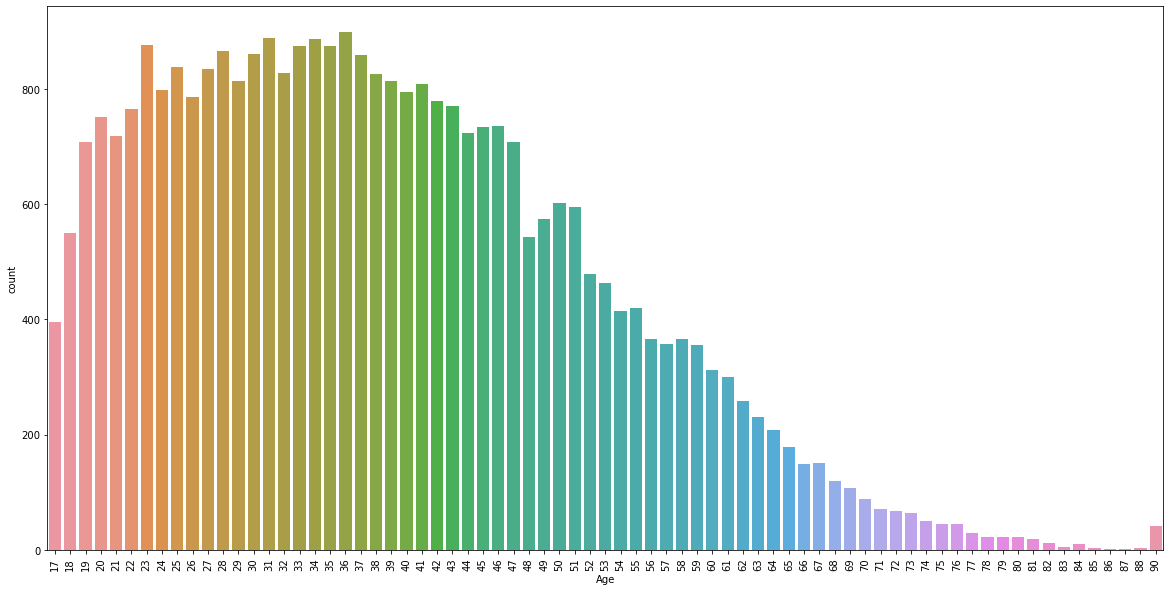

In [59]:
#plotting count plot
plt.figure(figsize=(20,10))
sns.countplot(x='Age',data=data)
plt.xticks(rotation='vertical')
plt.show()

**In this plot we can see that youngest from this dataset is with age 17 years and oldest is with 90 years. Most of the people who are there in this dataset is with age 36 years.**

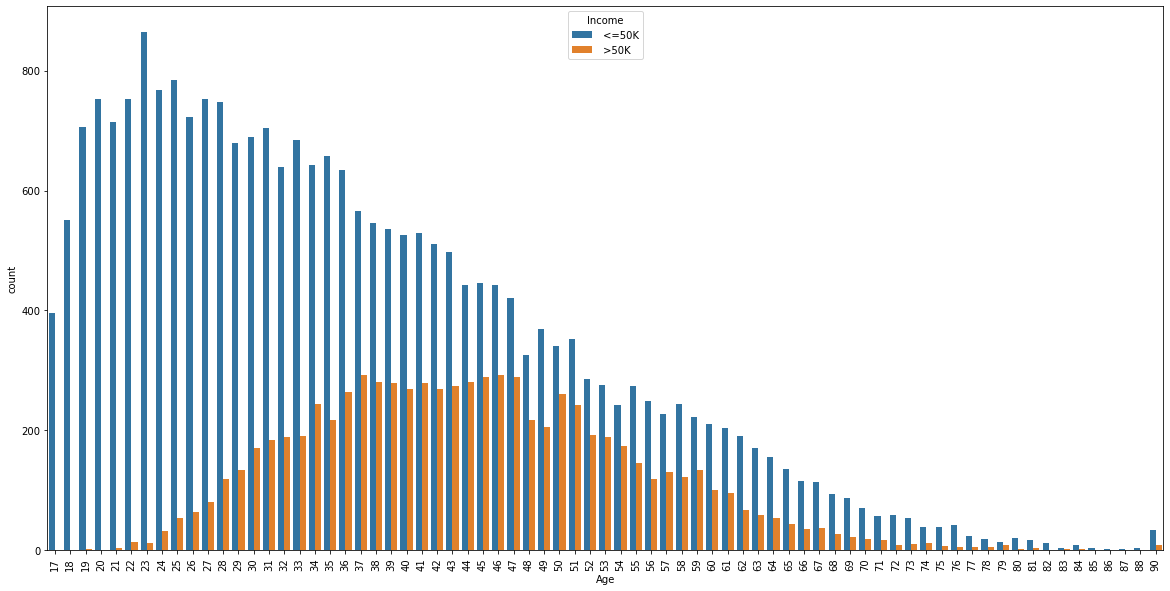

In [60]:
#plotting count plot
plt.figure(figsize=(20,10))
sns.countplot(x='Age',hue='Income',data=data)
plt.xticks(rotation='vertical')
plt.show()

**By looking at the plot we can see that people with age 17 and 18 does not earn more than 50k, from age 19 to 84 most of the people earn less than 50k as compared to the peopl who earn more than 50k.**

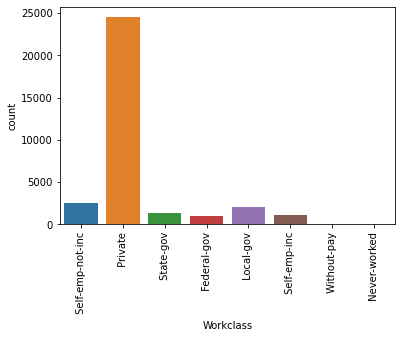

In [50]:
#plotting count plot
sns.countplot(x='Workclass',data=data)
plt.xticks(rotation='vertical')
plt.show()

**In this plot we can see that most of the people have workclass that is private and very few people are without pay and have never worked before.**

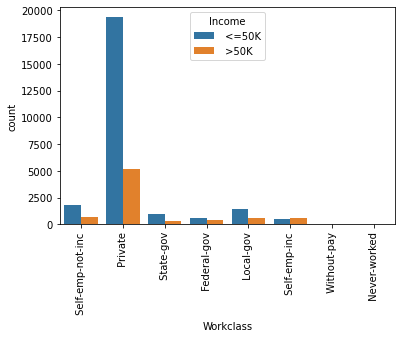

In [51]:
#plotting count plot
sns.countplot(x='Workclass',hue="Income",data=data)
plt.xticks(rotation='vertical')
plt.show()

**In this plot we can see that the people who are self-emp-inc are the only ones in which most of the people earned  more than 50k as compared to the people who earned less than 50k.In this plot most of the people work for private sector where most of the people earn less than 50k.**

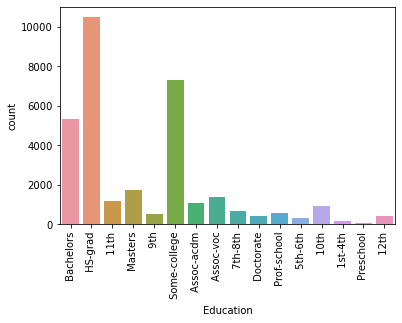

In [95]:
#plotting count plot
sns.countplot(x='Education',data=data)
plt.xticks(rotation='vertical')
plt.show()

**In this plot we can see that most of the people have education qualification of HS-grad and very few people have done pre-school.**

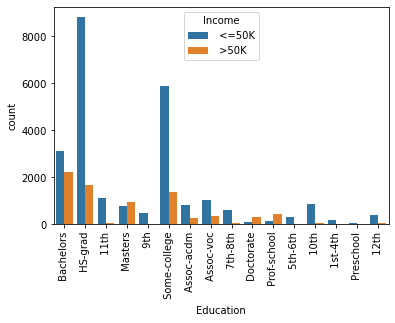

In [121]:
#plotting count plot
sns.countplot(x='Education',hue='Income',data=data)
plt.xticks(rotation='vertical')
plt.show()

**In this plot we can see that most of the people who have done HS-Grad are earning less than 50k and in every other education qualification which peoples have done most of the people are earning less than 50k except only one educational qualification that is prof-school, in this most of the people are earning more than 50k as compared to the one who are earning less than 50.**

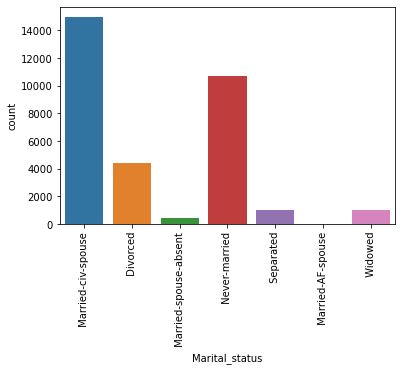

In [96]:
#plotting count plot
sns.countplot(x='Marital_status',data=data)
plt.xticks(rotation='vertical')
plt.show()

**By looking at the plot we can see that most of them have marital status as married to civialian spouse and very few of them are like married to armed force spouse.**

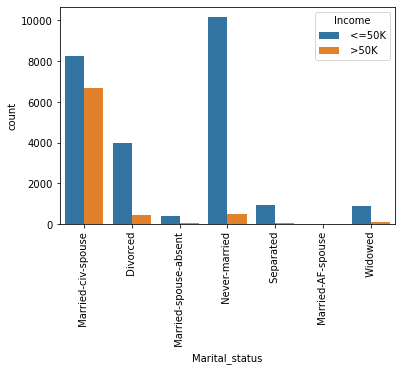

In [122]:
#plotting count plot
sns.countplot(x='Marital_status',hue='Income',data=data)
plt.xticks(rotation='vertical')
plt.show()

**In this plot we can see that most of the people who earn less than 50k are never married. and most of the people who are earn more than 50k are married to civilian spouse.**

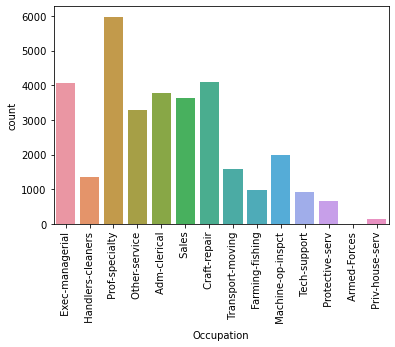

In [52]:
#plotting count plot
sns.countplot(x='Occupation',data=data)
plt.xticks(rotation='vertical')
plt.show()

**By looking at the plot we can see that most of the people have occupation as prof-speciality and and very few of them are working for armed forces.**

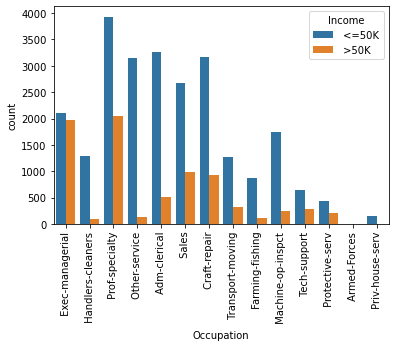

In [53]:
#plotting count plot
sns.countplot(x='Occupation',hue='Income',data=data)
plt.xticks(rotation='vertical')
plt.show()

**In this plot we can see that most of the people who are earning less than 50k have occupation of prof_spaciality and most of the people who are earning more than 50k have occupation of prof_spaciality.**

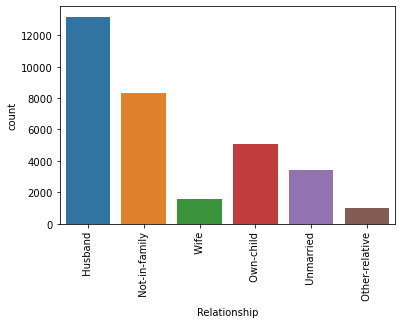

In [98]:
#plotting count plot
sns.countplot(x='Relationship',data=data)
plt.xticks(rotation='vertical')
plt.show()

**In this plot we can see that most of them are husband and very few of them are other relative.**

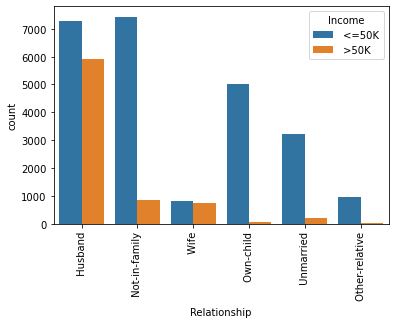

In [124]:
#plotting count plot
sns.countplot(x='Relationship',hue='Income',data=data)
plt.xticks(rotation='vertical')
plt.show()

**Most of the people who are earning less than 50k have a relationship of not in family and most of them who are earning more than 50k have relationship of husband.**

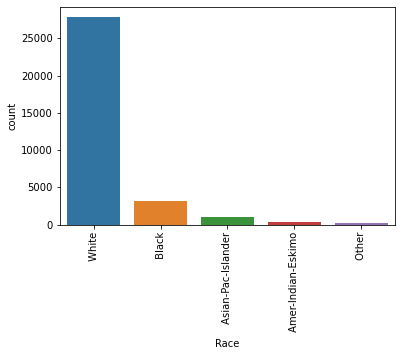

In [99]:
#plotting count plot
sns.countplot(x='Race',data=data)
plt.xticks(rotation='vertical')
plt.show()

**In this plot we can see the racial classification of the people, most of them are white.**

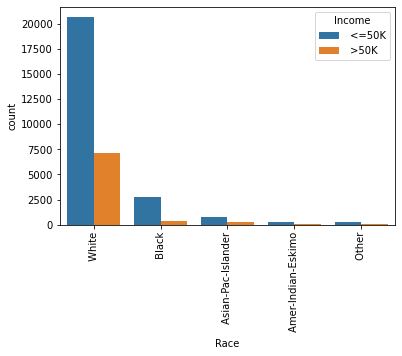

In [125]:
#plotting count plot
sns.countplot(x='Race',hue='Income',data=data)
plt.xticks(rotation='vertical')
plt.show()

**In this plot we can see that most of the people who earned less than 50k and also more than 50k are white.**

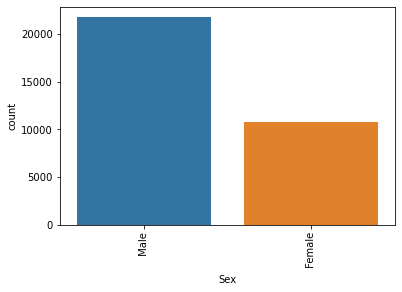

In [100]:
#plotting count plot
sns.countplot(x='Sex',data=data)
plt.xticks(rotation='vertical')
plt.show()

**By looking at the plot we can see that most of the people from this dataset are male.**

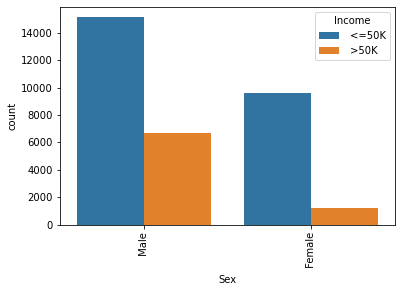

In [126]:
#plotting count plot
sns.countplot(x='Sex',hue='Income',data=data)
plt.xticks(rotation='vertical')
plt.show()

**In this plot we can see that most if the people who earn less than 50k are male and also who earn more than 50 are also male.**

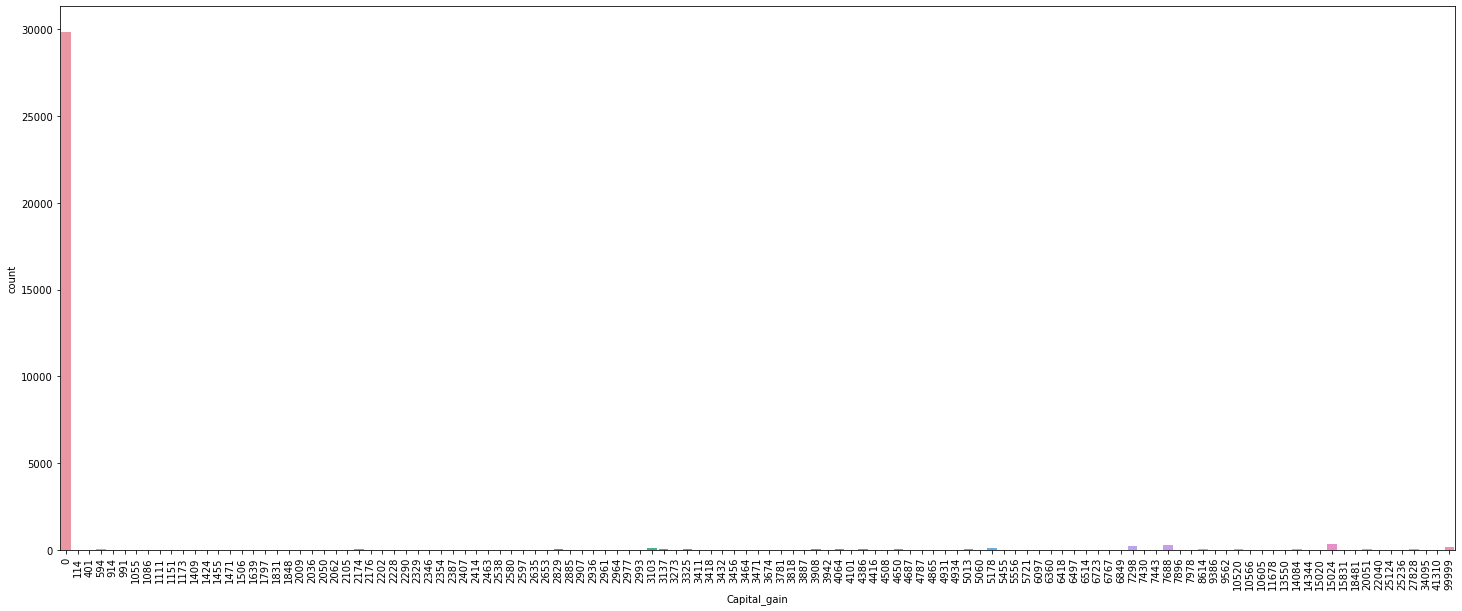

In [103]:
#plotting count plot
plt.figure(figsize=(25,10))
sns.countplot(x='Capital_gain',data=data)
plt.xticks(rotation='vertical')
plt.show()

**By looking at the plot we can see that most of the people have not gained any capital while around 1000 people may have agained a capital of 15024.**

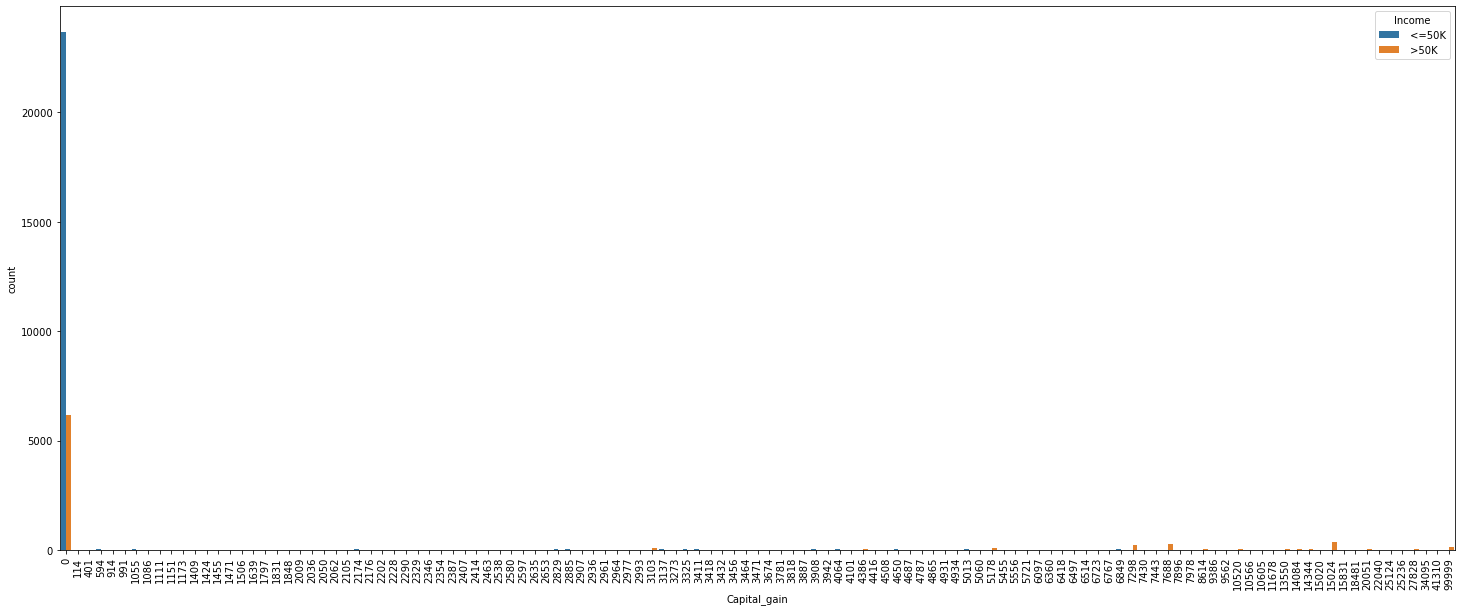

In [127]:
#plotting count plot
plt.figure(figsize=(25,10))
sns.countplot(x='Capital_gain',hue='Income',data=data)
plt.xticks(rotation='vertical')
plt.show()

**In this plot we can see that most of the people who are earning less than 50k have not gained any capital and also who are earning more than 50k have also not gained any capital.**

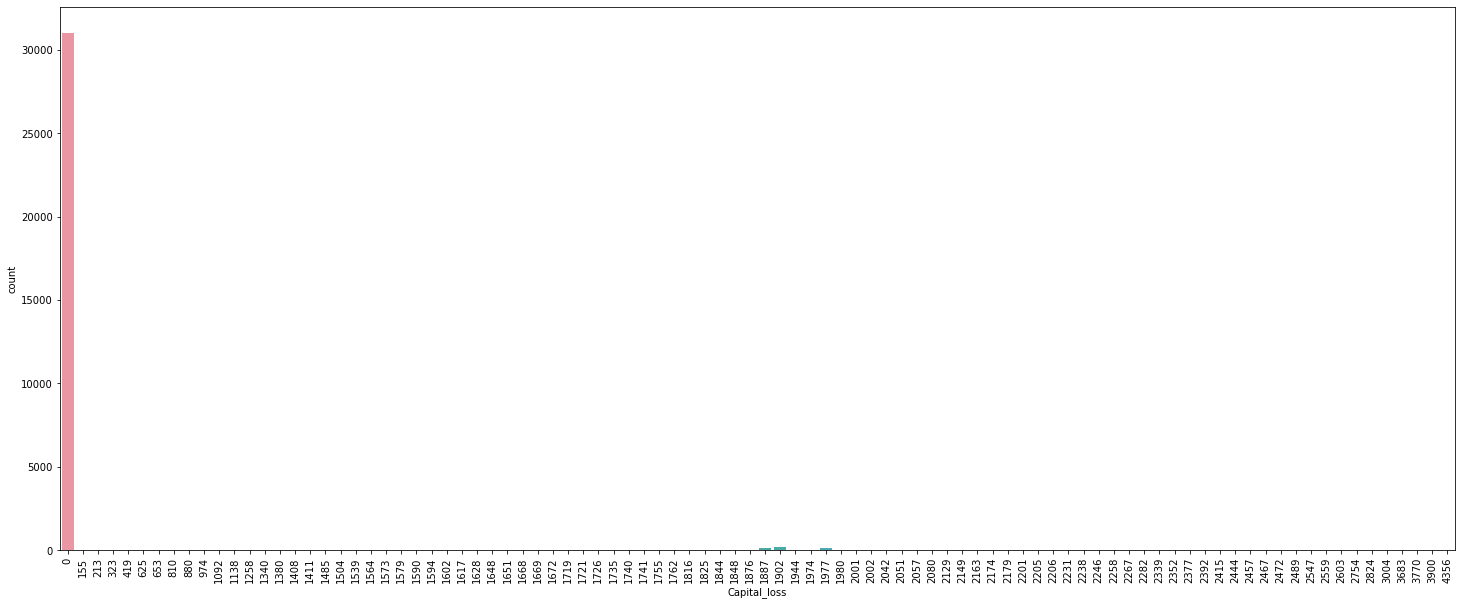

In [104]:
#plotting count plot
plt.figure(figsize=(25,10))
sns.countplot(x='Capital_loss',data=data)
plt.xticks(rotation='vertical')
plt.show()

**By looking at the plot we can see that most of the people have not loss any capital, and very few that is between 500 to 1500 people have a loss of capital around 1902.**

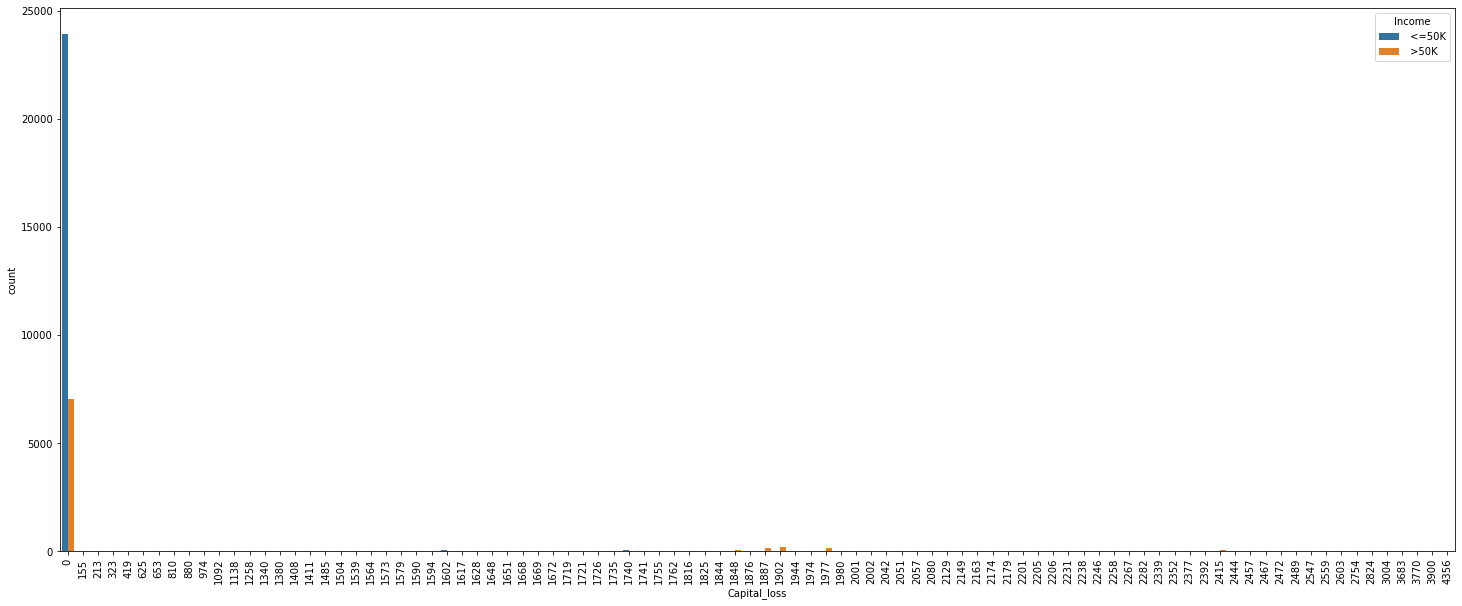

In [129]:
#plotting count plot
plt.figure(figsize=(25,10))
sns.countplot(x='Capital_loss',hue='Income',data=data)
plt.xticks(rotation='vertical')
plt.show()

**In this plot we can see that most of the people who are earning less than 50k have not lost any capital and also who are earning more than 50k have also not lost any capital.**

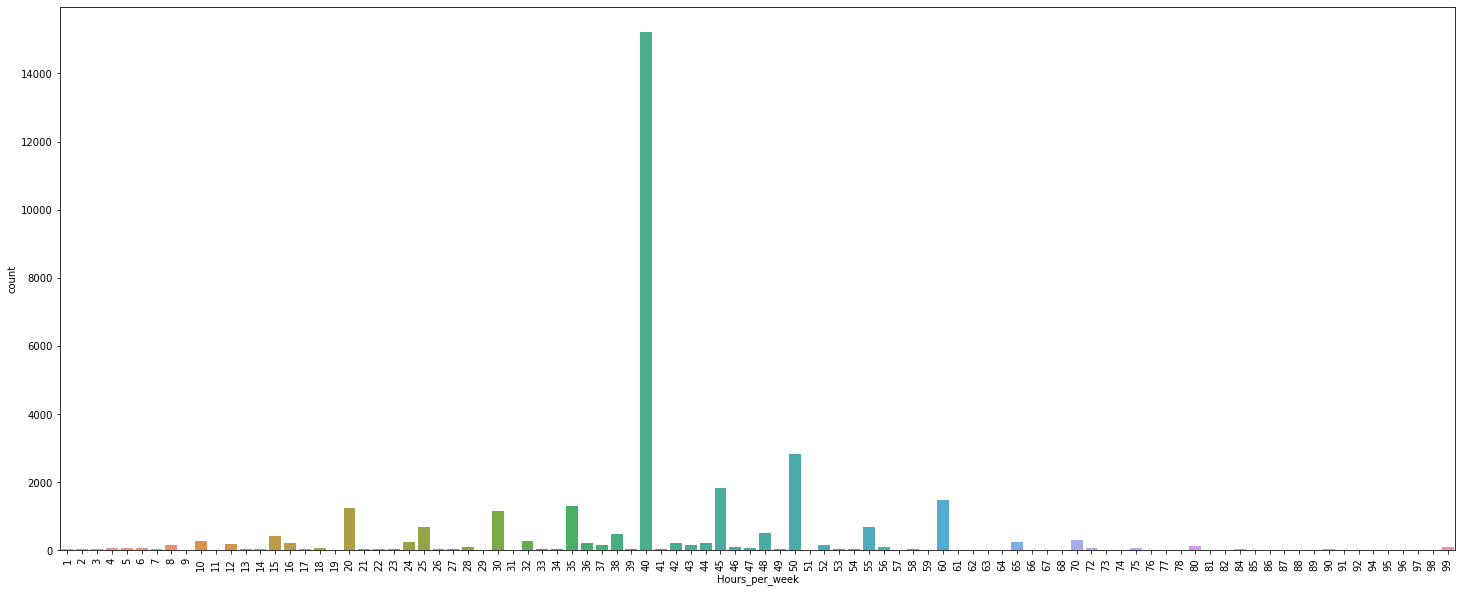

In [105]:
#plotting count plot
plt.figure(figsize=(25,10))
sns.countplot(x='Hours_per_week',data=data)
plt.xticks(rotation='vertical')
plt.show()

**In this plot we can see that most of the people work for 40 hours per week.highest working hours for week is 99 and least is 1 hour per week.**

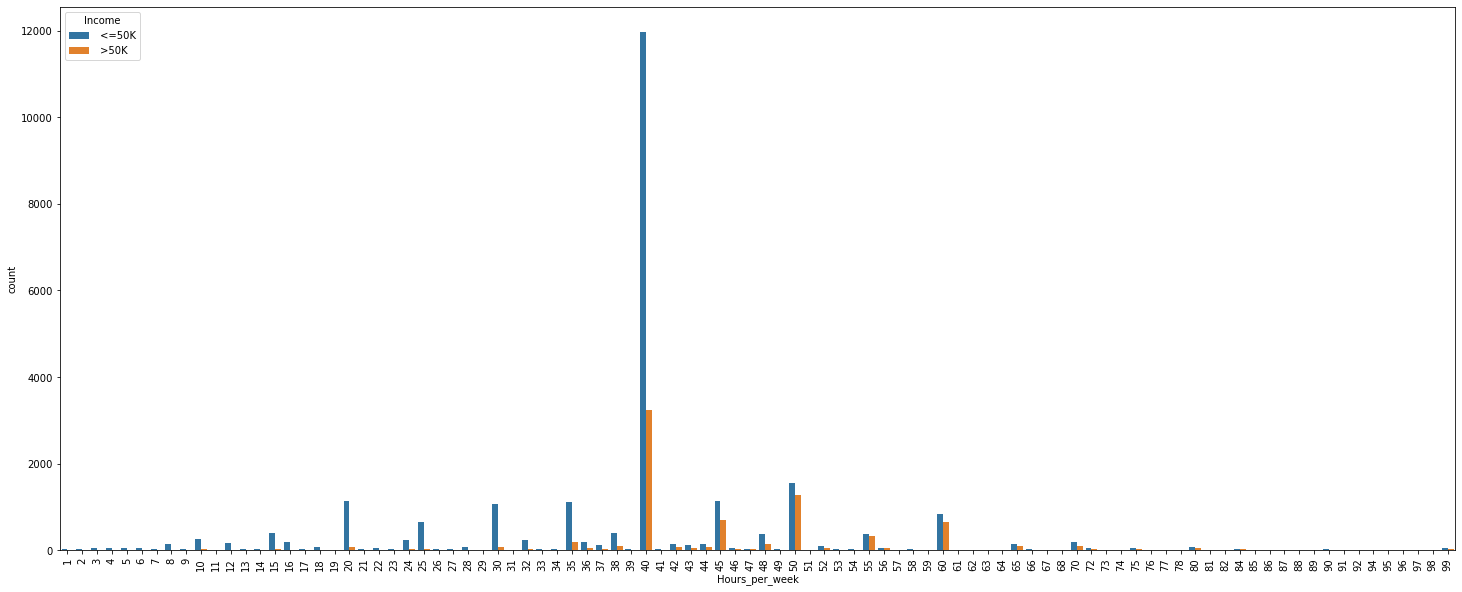

In [130]:
#plotting count plot
plt.figure(figsize=(25,10))
sns.countplot(x='Hours_per_week',hue='Income',data=data)
plt.xticks(rotation='vertical')
plt.show()

**In this plot we can see that most of the people who are earning less than 50k works for 40hours per week and also people who are earning more than 50k are working for 40 hours per week.**

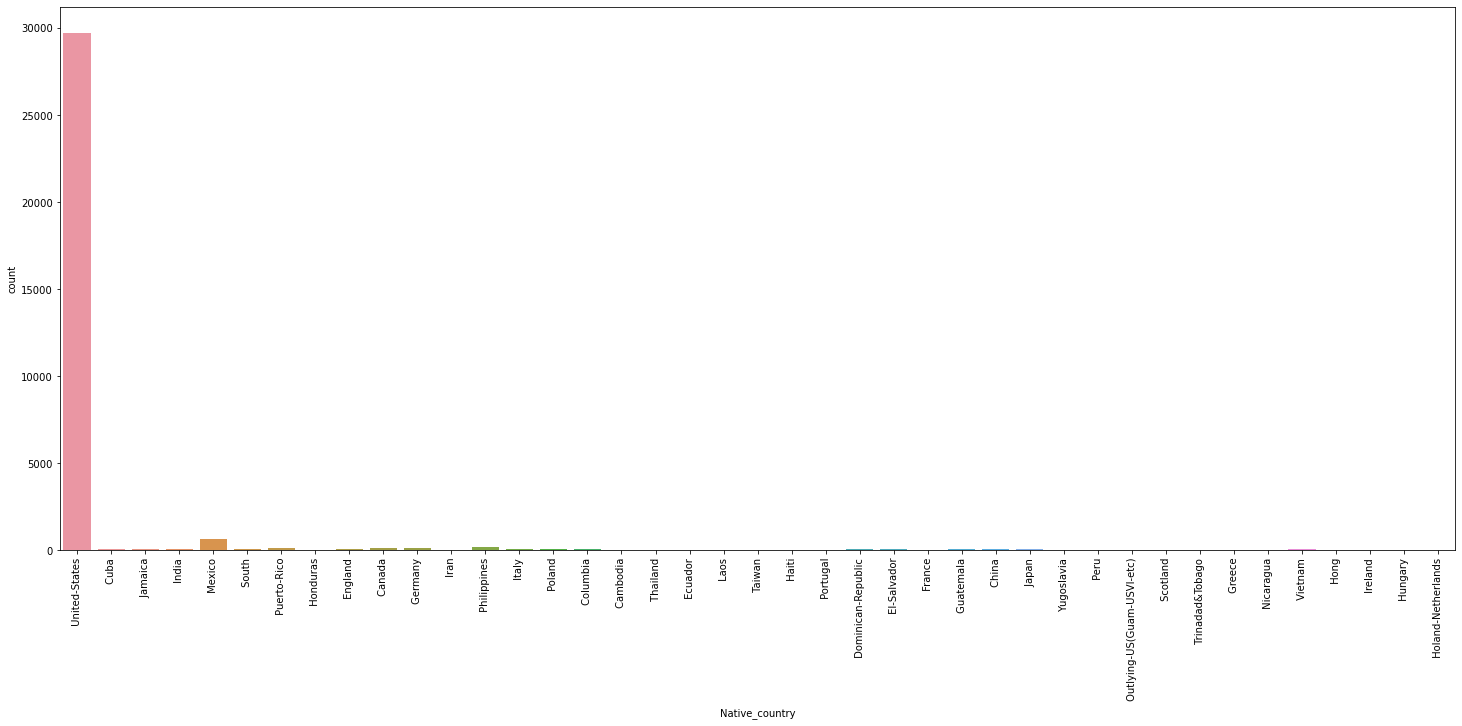

In [76]:
#plotting count plot
plt.figure(figsize=(25,10))
sns.countplot(x='Native_country',data=data)
plt.xticks(rotation='vertical')
plt.show()

**In this plot we can see that most of the people are from united states.**

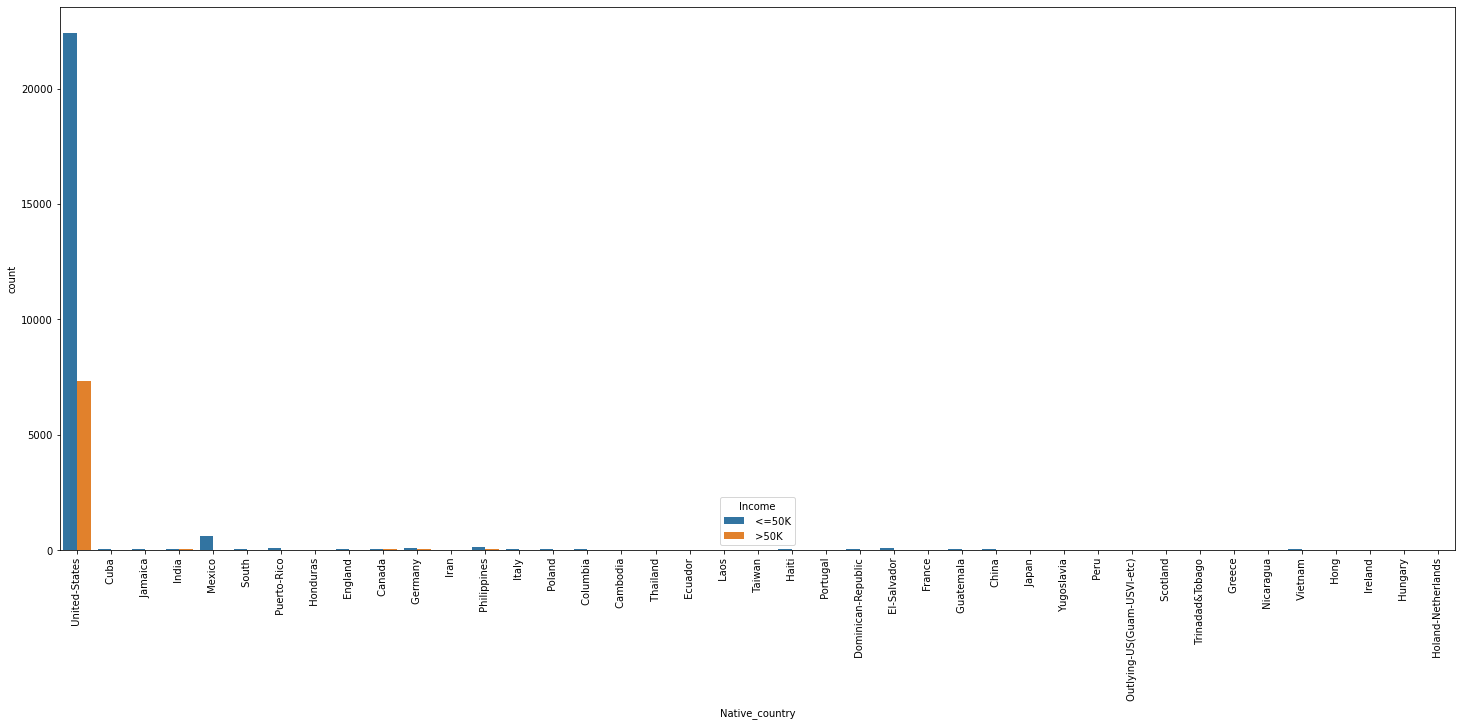

In [77]:
#plotting count plot
plt.figure(figsize=(25,10))
sns.countplot(x='Native_country',hue='Income',data=data)
plt.xticks(rotation='vertical')
plt.show()

**In this plot we can see that most of the people who earn more than 50k and less than 50k are from United states.**

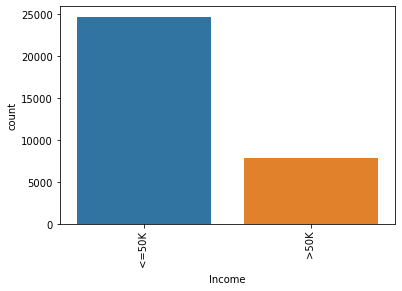

In [109]:
#plotting count plot
sns.countplot(x='Income',data=data)
plt.xticks(rotation='vertical')
plt.show()

**In this plot we can see that most of the people have income less than 50k.and by looking at the plot we can see that the data is imbalanced.so further i will use the smote technique to balance the data.**

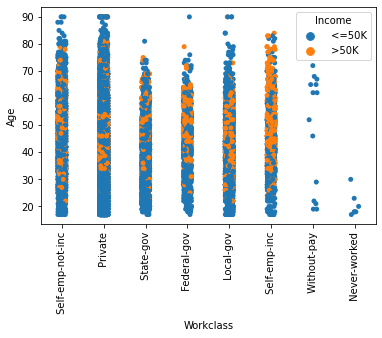

In [78]:
#plotting bar plot
sns.stripplot(x='Workclass',y='Age',hue='Income',data=data)
plt.xticks(rotation="vertical")
plt.show()

**In this plot we can see that most of the people who are earning more than 50k are from workclass  self-epm-inc and from age between 30 to 80 years.**

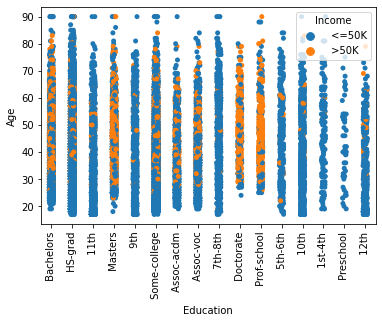

In [136]:
#plotting bar plot
sns.stripplot(x='Education',y='Age',hue='Income',data=data)
plt.xticks(rotation="vertical")
plt.show()

**By looking at the plot we can see that most of the people who earns more than 50k have done education that is prof-school and Doctorate.And have age between 30 to 80 years.**

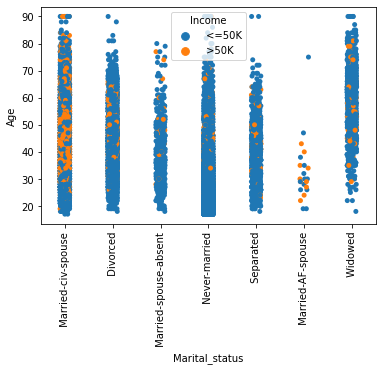

In [138]:
#plotting bar plot
sns.stripplot(x='Marital_status',y='Age',hue='Income',data=data)
plt.xticks(rotation="vertical")
plt.show()

**In this plot we can see that most of the people who are earning more than 50k have marital status of married to civilian spouse and have age between 30 to 80 years.**

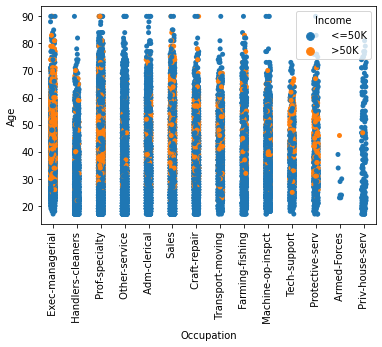

In [79]:
#plotting bar plot
sns.stripplot(x='Occupation',y='Age',hue='Income',data=data)
plt.xticks(rotation="vertical")
plt.show()

**By looking at the plot we can see that most of the people who are earning than 50k are having occupation of exec managerical and prof-speciality and are from age between 30 to 80 years.**

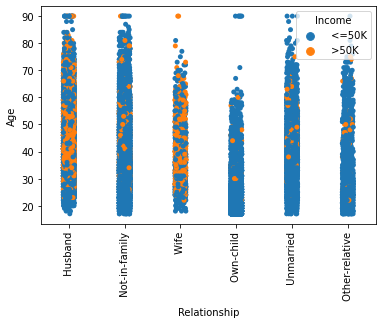

In [140]:
#plotting bar plot
sns.stripplot(x='Relationship',y='Age',hue='Income',data=data)
plt.xticks(rotation="vertical")
plt.show()

**By looking at the plot we can see that most of the people who earns more than 50k have relationship of husband and wife and have age between 30 to 80years.**

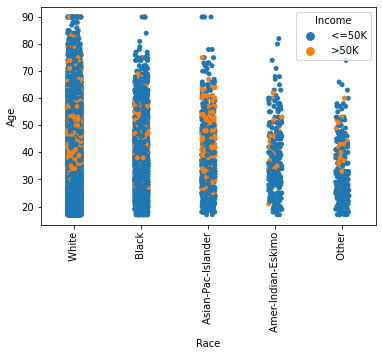

In [141]:
#plotting bar plot
sns.stripplot(x='Race',y='Age',hue='Income',data=data)
plt.xticks(rotation="vertical")
plt.show()

**In this plot we can see that most of the people who earn more than 50k are from racial group white and asian pac islander and have age between 30 to 60 years.**

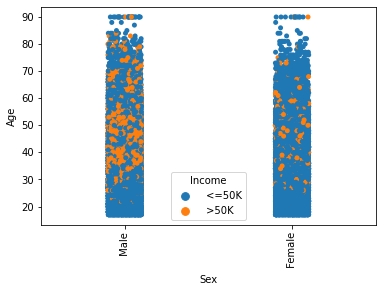

In [142]:
#plotting bar plot
sns.stripplot(x='Sex',y='Age',hue='Income',data=data)
plt.xticks(rotation="vertical")
plt.show()

**Most of the people who earn more than 50k are male and have age between 30 to 80 years.**

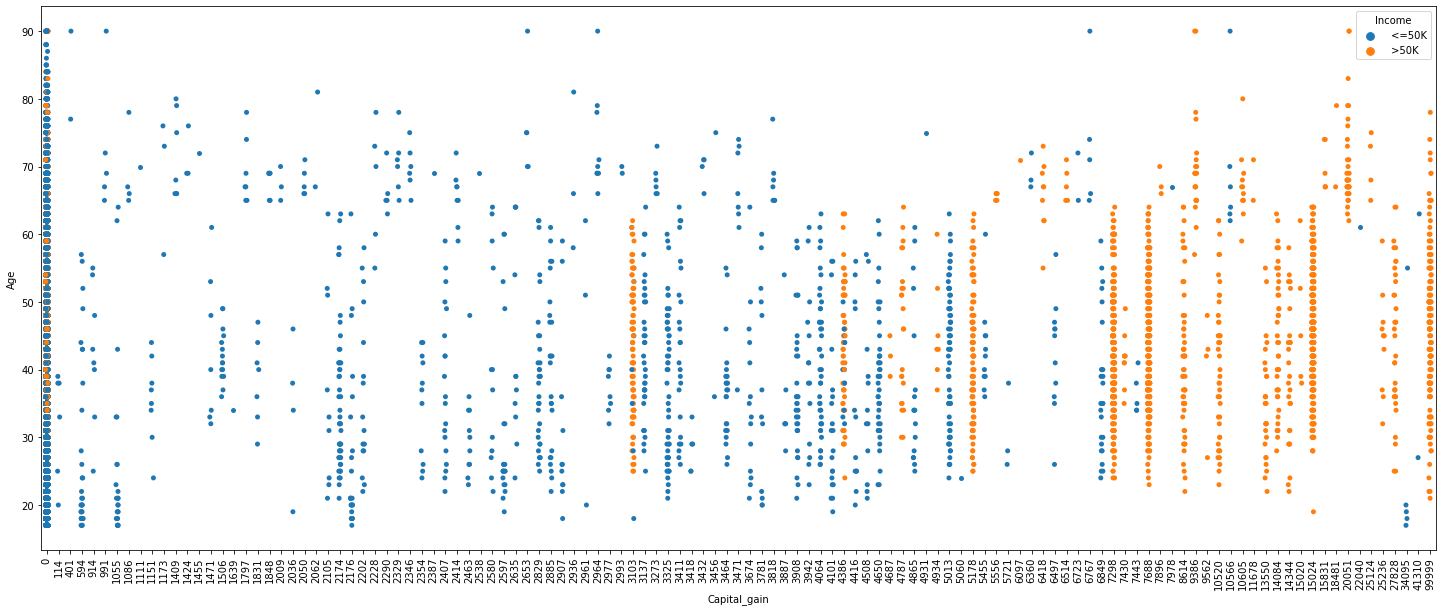

In [145]:
#plotting bar plot
plt.figure(figsize=(25,10))
sns.stripplot(x='Capital_gain',y='Age',hue='Income',data=data)
plt.xticks(rotation="vertical")
plt.show()

**Most of the people who earn more than 50k have gained a capital between 7298 to 99999 and have age between 20 to 80 years.**

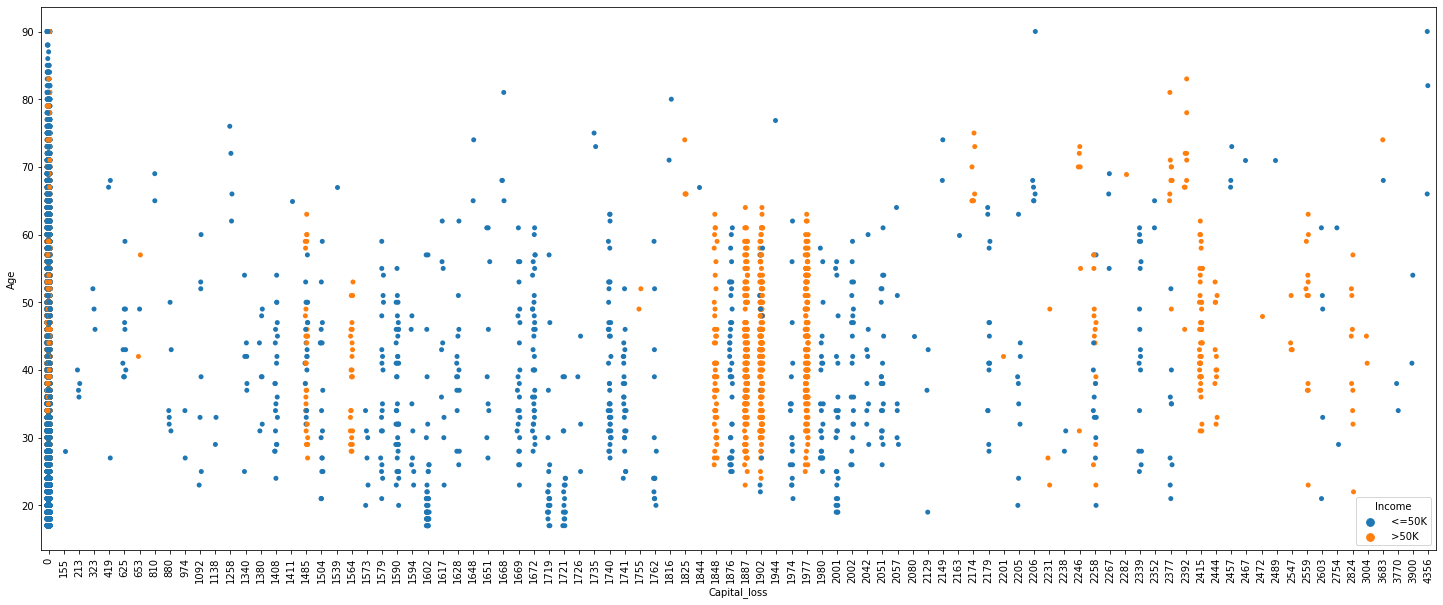

In [147]:
#plotting bar plot
plt.figure(figsize=(25,10))
sns.stripplot(x='Capital_loss',y='Age',hue='Income',data=data)
plt.xticks(rotation="vertical")
plt.show()

**Most of the people who earn more than 50k have lost a capital between 1846 to 1977 and have age between 25 to 70 years.**

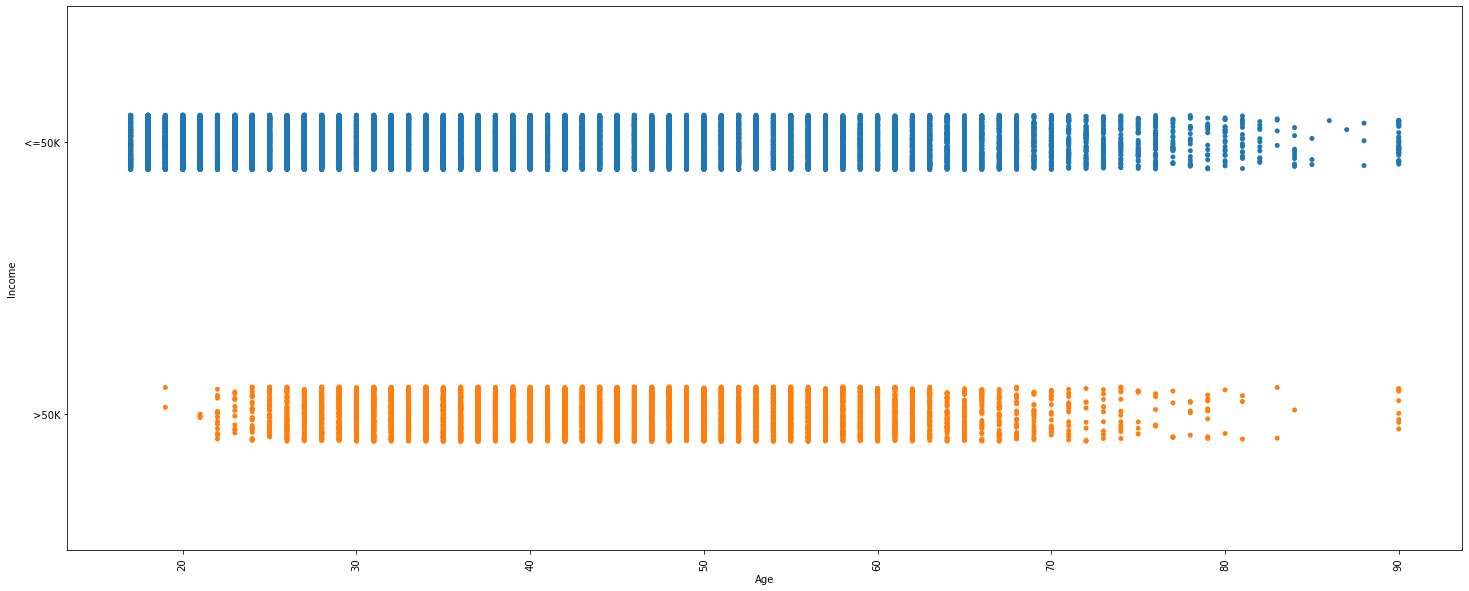

In [17]:
#plotting bar plot
plt.figure(figsize=(25,10))
sns.stripplot(x='Age',y='Income',data=data)
plt.xticks(rotation="vertical")
plt.show()

**In this plot we can see that people with age from 18 to 90 are earning less than 50k and people who are earning more than 50k have age between 22 to 84 years.**

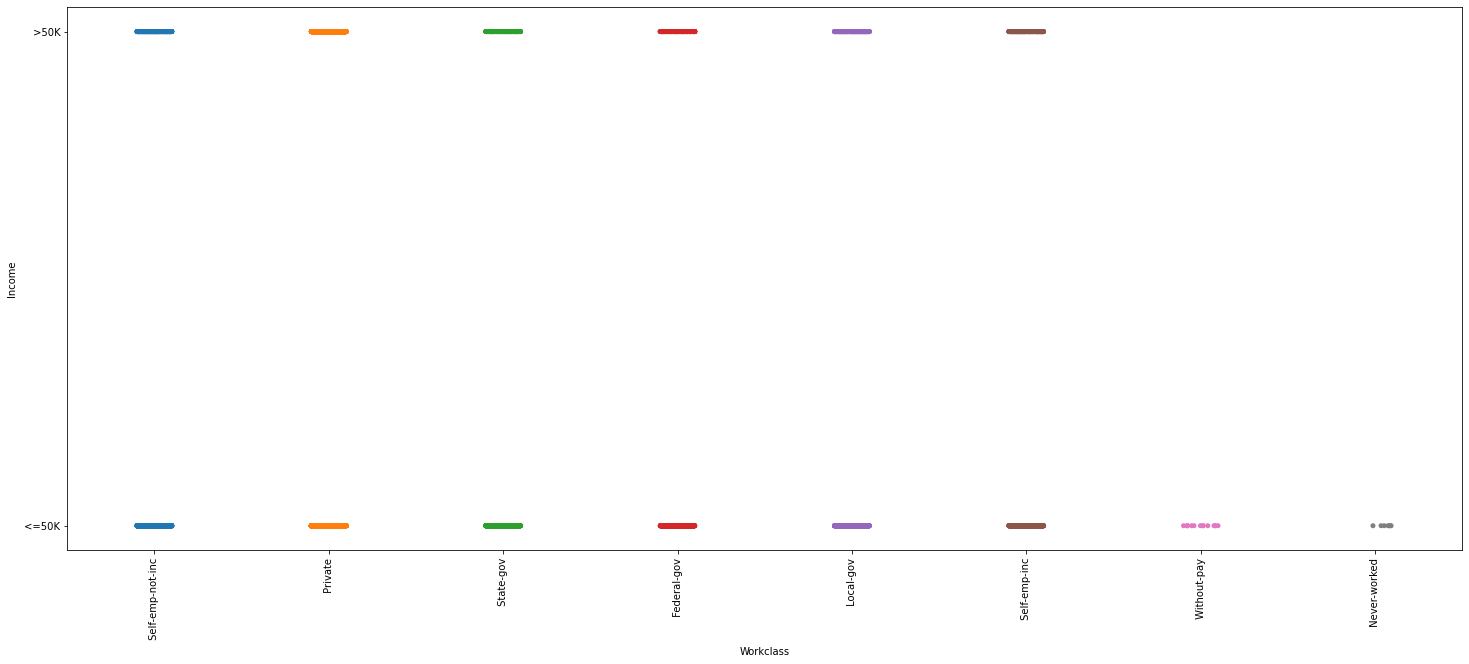

In [80]:
#plotting bar plot
plt.figure(figsize=(25,10))
sns.stripplot(x='Workclass',y='Income',data=data)
plt.xticks(rotation="vertical")
plt.show()

**In this plot we can see that people whi who are without pay and who have never worked are not able to earn more than 50k which is obvious and rest of the sector of workclass they are able to earn more than 50k.**

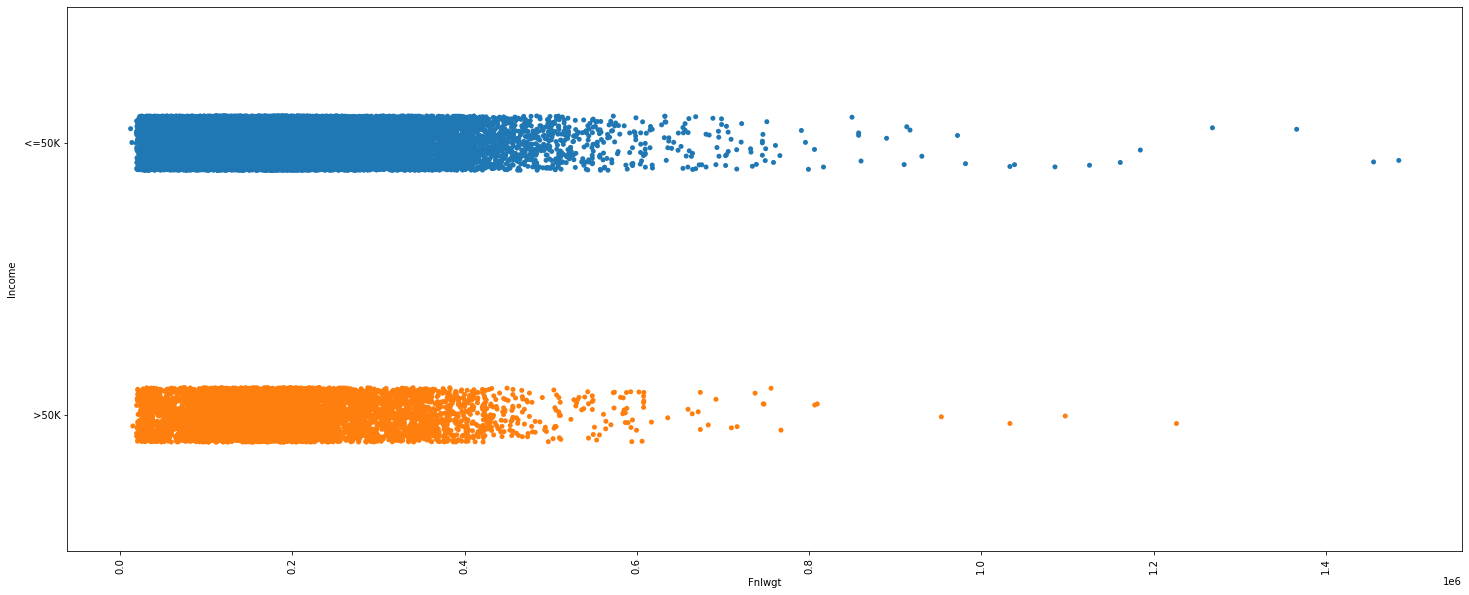

In [19]:
#plotting bar plot
plt.figure(figsize=(25,10))
sns.stripplot(x='Fnlwgt',y='Income',data=data)
plt.xticks(rotation="vertical")
plt.show()

**In this plot we can see that the if the final weight is between 0.0 to 0.4 most of the people are earning more than 50k after that with final weight above 4 very few poeple are are earning more than 50k.**
**And for the people who are earning less than 50k the final weight is considered to be between 0.0 to 0.5.**

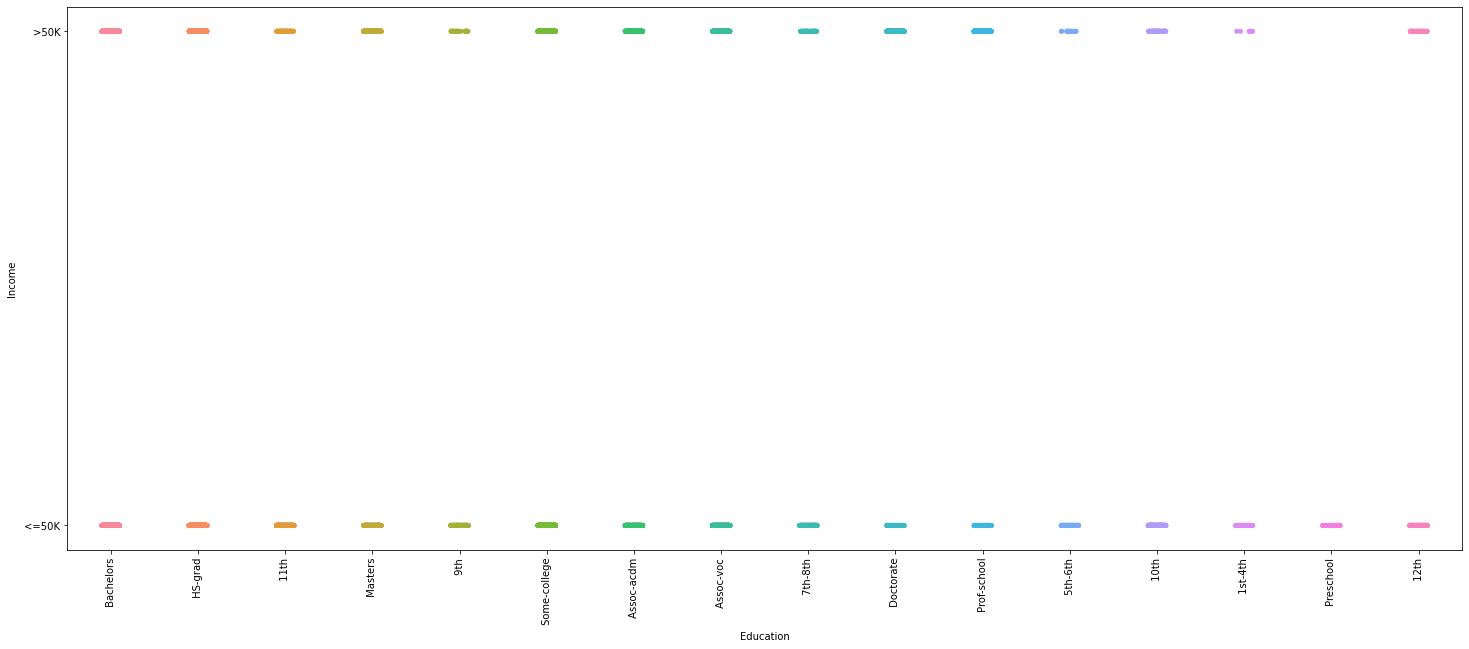

In [20]:
#plotting bar plot
plt.figure(figsize=(25,10))
sns.stripplot(x='Education',y='Income',data=data)
plt.xticks(rotation="vertical")
plt.show()

**In this plot we can see that the people who are having the education as preschool are not earning more than 50k rest all the people with other eaducation are able to earn more than 50k .**
**And all the people including preschool as education are earning less than 50k.**

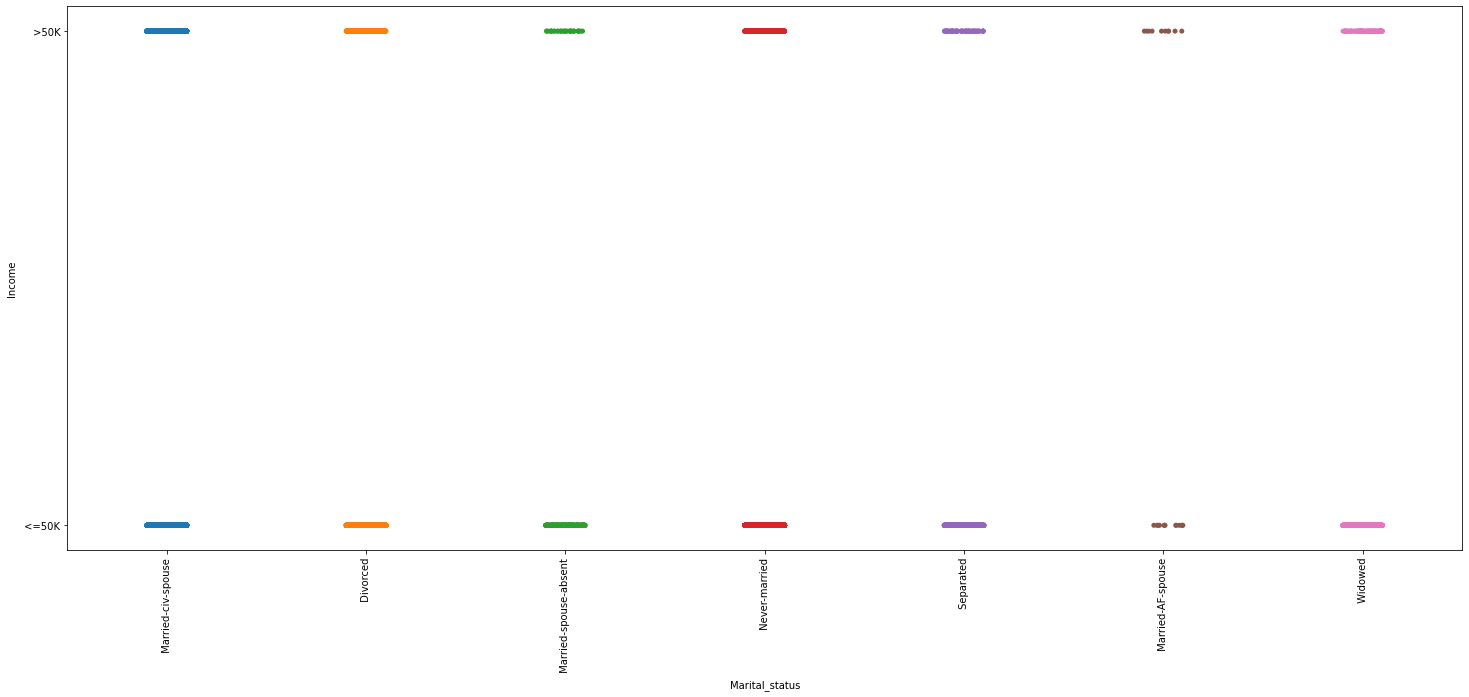

In [21]:
#plotting bar plot
plt.figure(figsize=(25,10))
sns.stripplot(x='Marital_status',y='Income',data=data)
plt.xticks(rotation="vertical")
plt.show()

**In this plot we can see that all the people having marital status are earning more than 50k as well as earning less than 50k.**

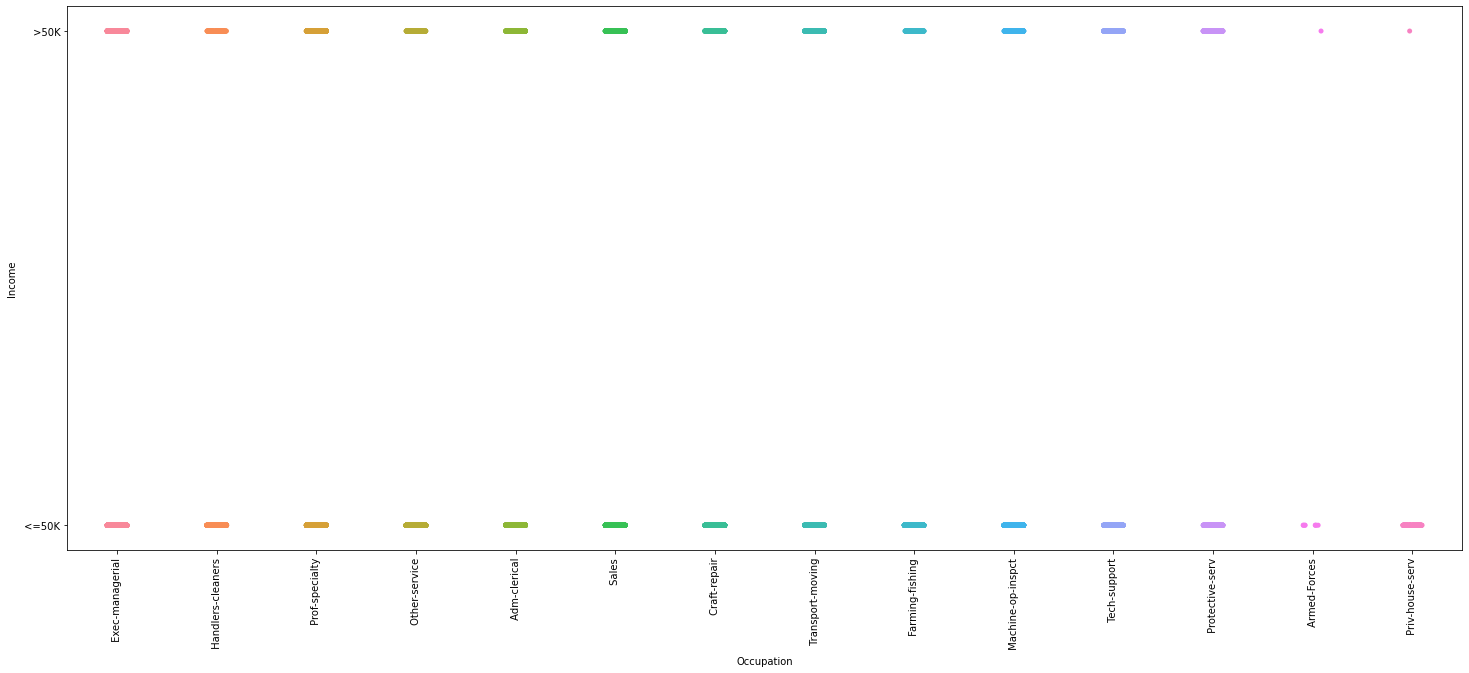

In [81]:
#plotting bar plot
plt.figure(figsize=(25,10))
sns.stripplot(x='Occupation',y='Income',data=data)
plt.xticks(rotation="vertical")
plt.show()

**In this plot we can see that each and evry people with different occupation are earning more than 50k and less than 50k but very few people with occupation as armed forces and priv-house-serv are earning more than 50k.**

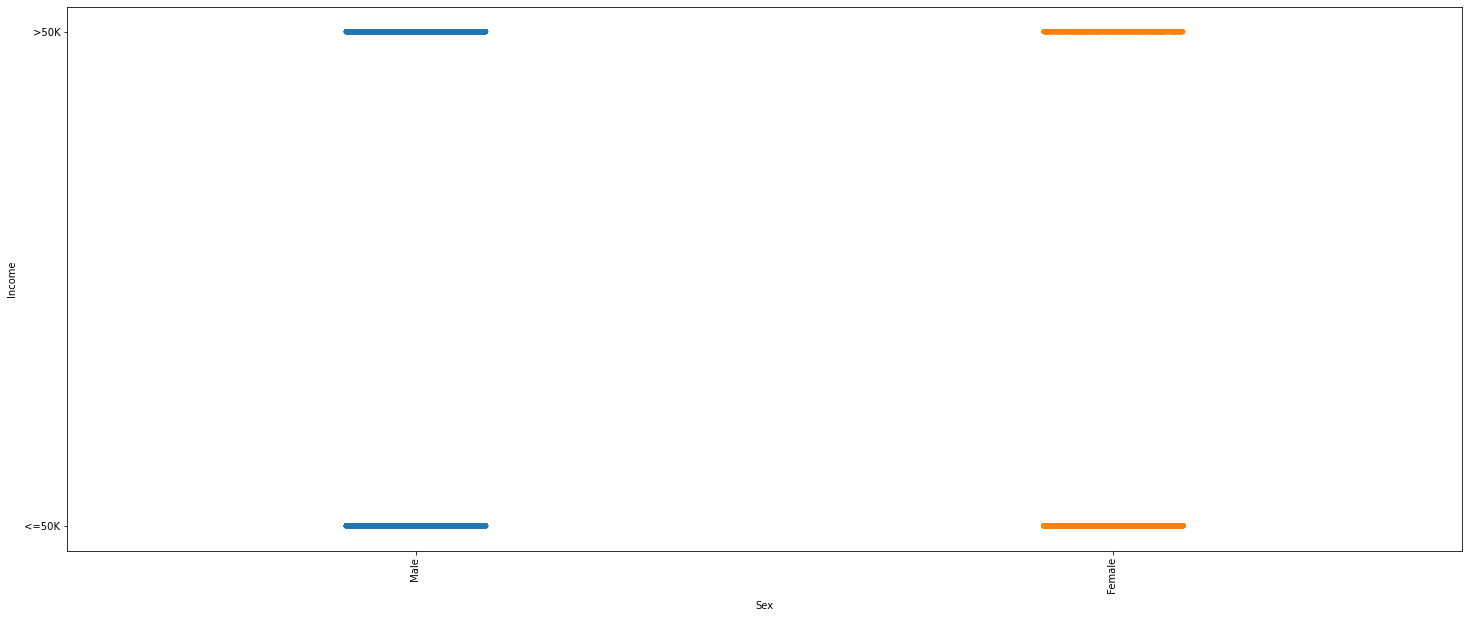

In [25]:
#plotting bar plot
plt.figure(figsize=(25,10))
sns.stripplot(x='Sex',y='Income',data=data)
plt.xticks(rotation="vertical")
plt.show()

**In this plot we can see that both males and females are able to earn more than 50k and less than 50k.**

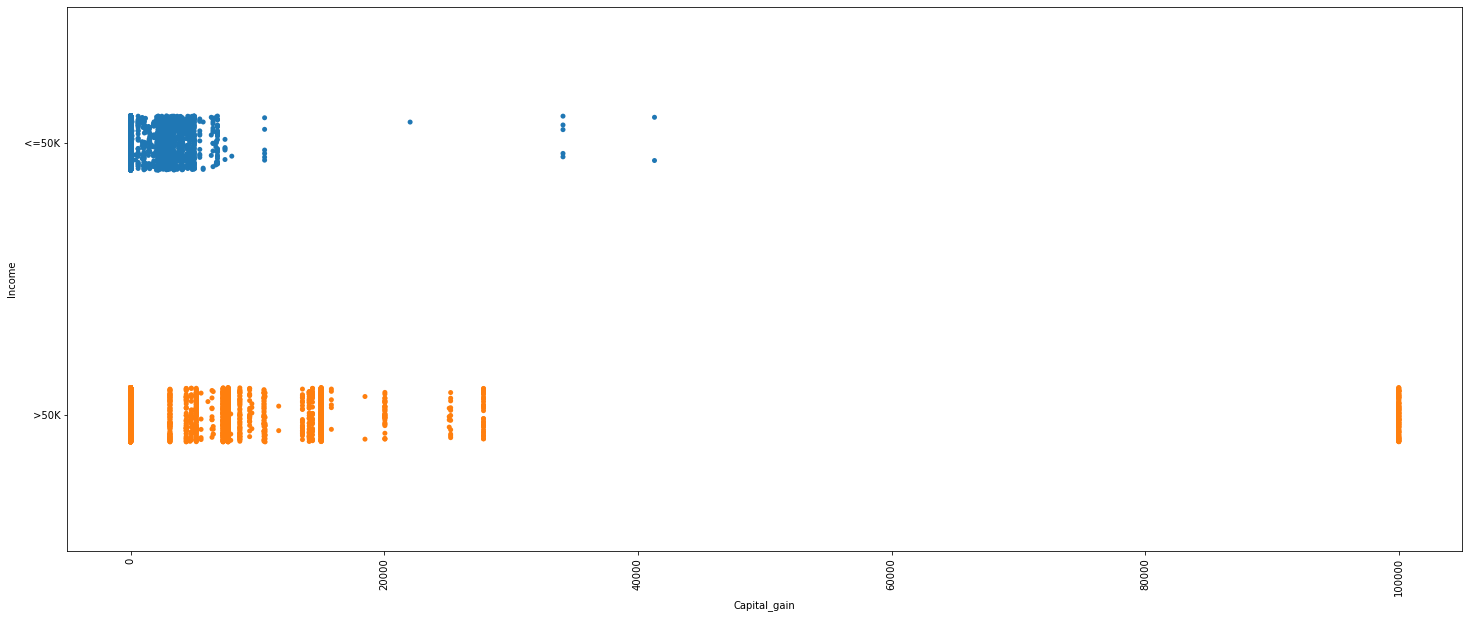

In [26]:
#plotting bar plot
plt.figure(figsize=(25,10))
sns.stripplot(x='Capital_gain',y='Income',data=data)
plt.xticks(rotation="vertical")
plt.show()

**In this plot we can see that poeple who have gained a capital of 100000 are surely earning more than 50k and also people who have not gained capital they are also earning more than 50k as well as people who have gained capital between 1000 to 30000 are earning more than 50k. And there are some people who have gained capital between 0 to 50000, they are earning less than 50k.**

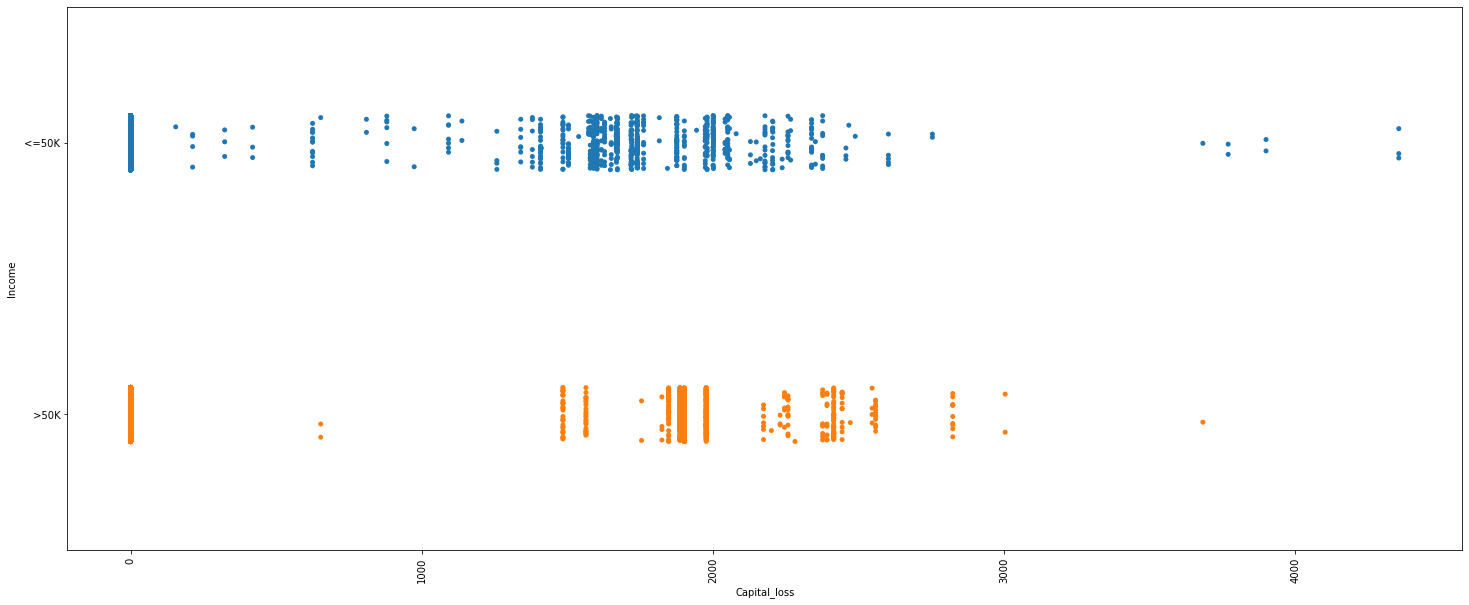

In [27]:
#plotting bar plot
plt.figure(figsize=(25,10))
sns.stripplot(x='Capital_loss',y='Income',data=data)
plt.xticks(rotation="vertical")
plt.show()

**In this plot we can see that people who have lost a capital between 0 to 3000 are earning less than 50k and also people who have lost capital of 0 to 3000 are earning more than 50k.**

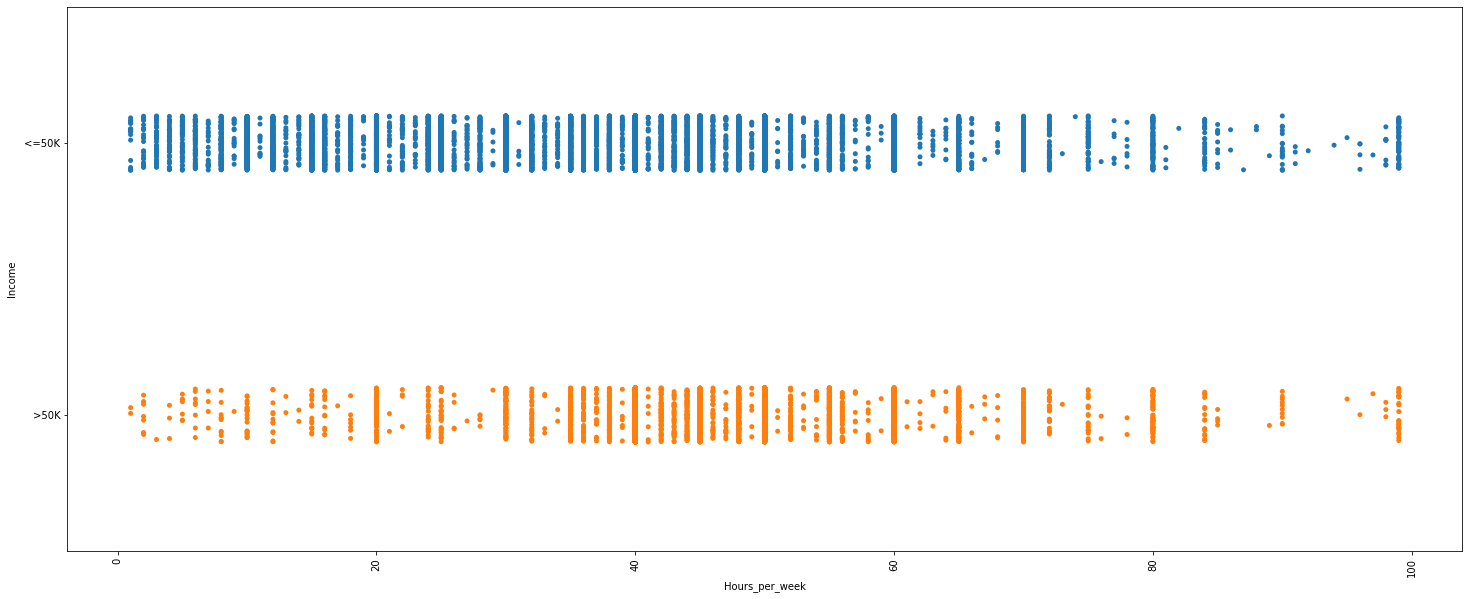

In [28]:
#plotting bar plot
plt.figure(figsize=(25,10))
sns.stripplot(x='Hours_per_week',y='Income',data=data)
plt.xticks(rotation="vertical")
plt.show()

**In this plot we can see that irrespective of working of hours per week from 0 to 100hrs people are earning more than 50k as well as earning less than 50k.**

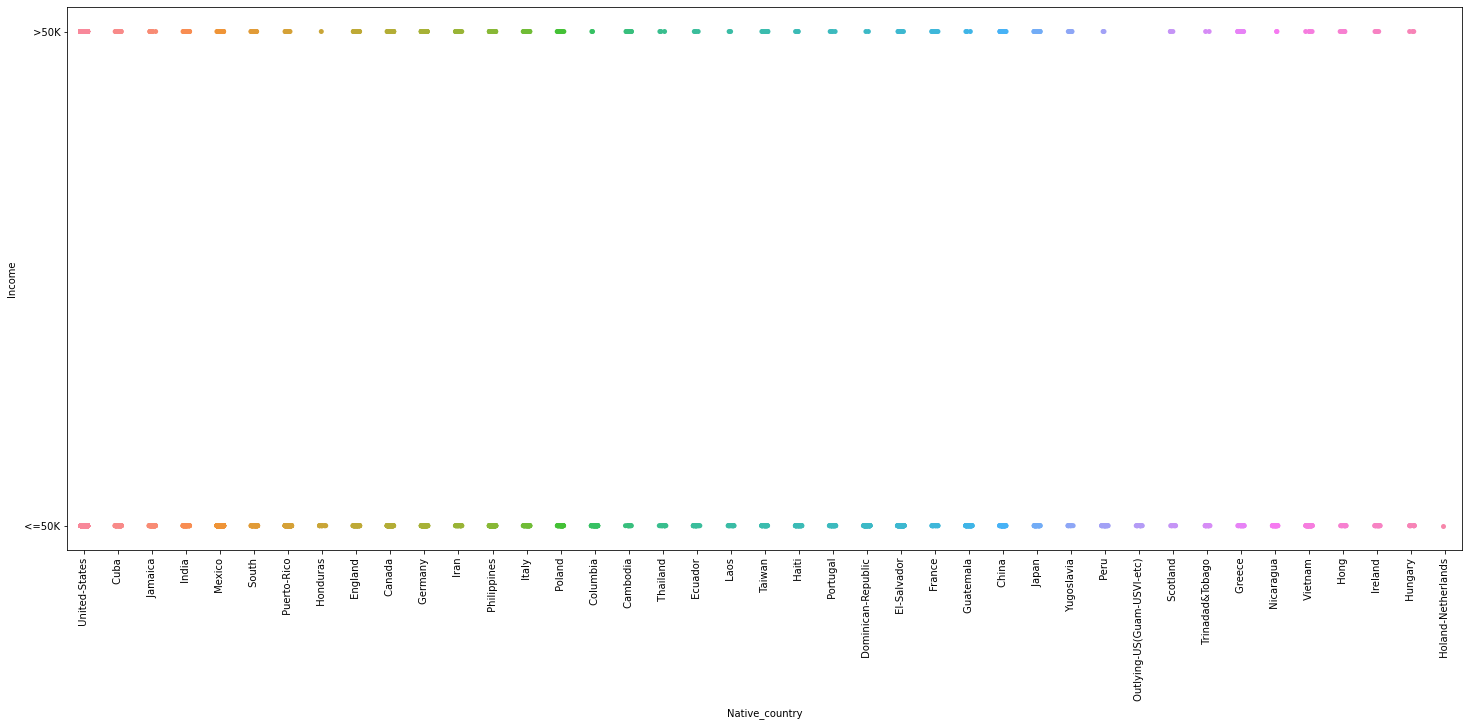

In [82]:
#plotting bar plot
plt.figure(figsize=(25,10))
sns.stripplot(x='Native_country',y='Income',data=data)
plt.xticks(rotation="vertical")
plt.show()

**In this plot we can see that people from all the native countries are earning more than 50k as well as earning less tham 50k.**

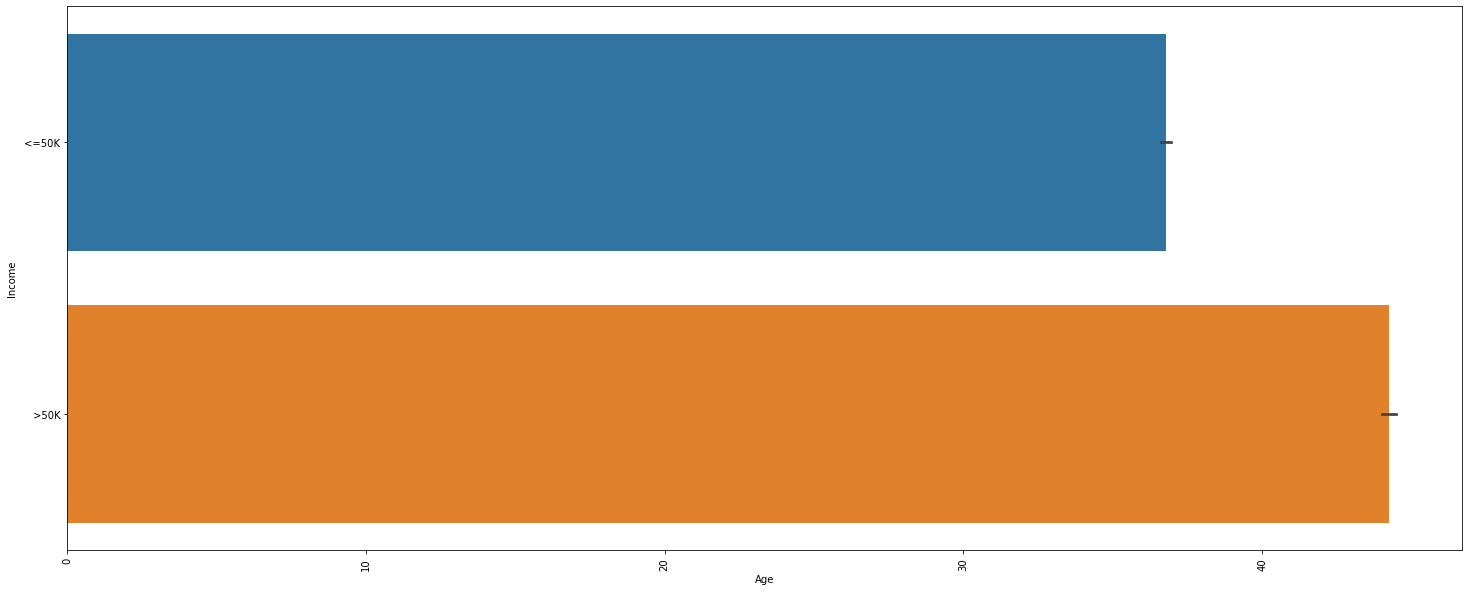

In [32]:
#plotting bar plot
plt.figure(figsize=(25,10))
sns.barplot(x='Age',y='Income',data=data)
plt.xticks(rotation="vertical")
plt.show()

**In this plot we can see that more people with age more than 35 earns more than 50k as compared to the ones who earns less than 50k.**

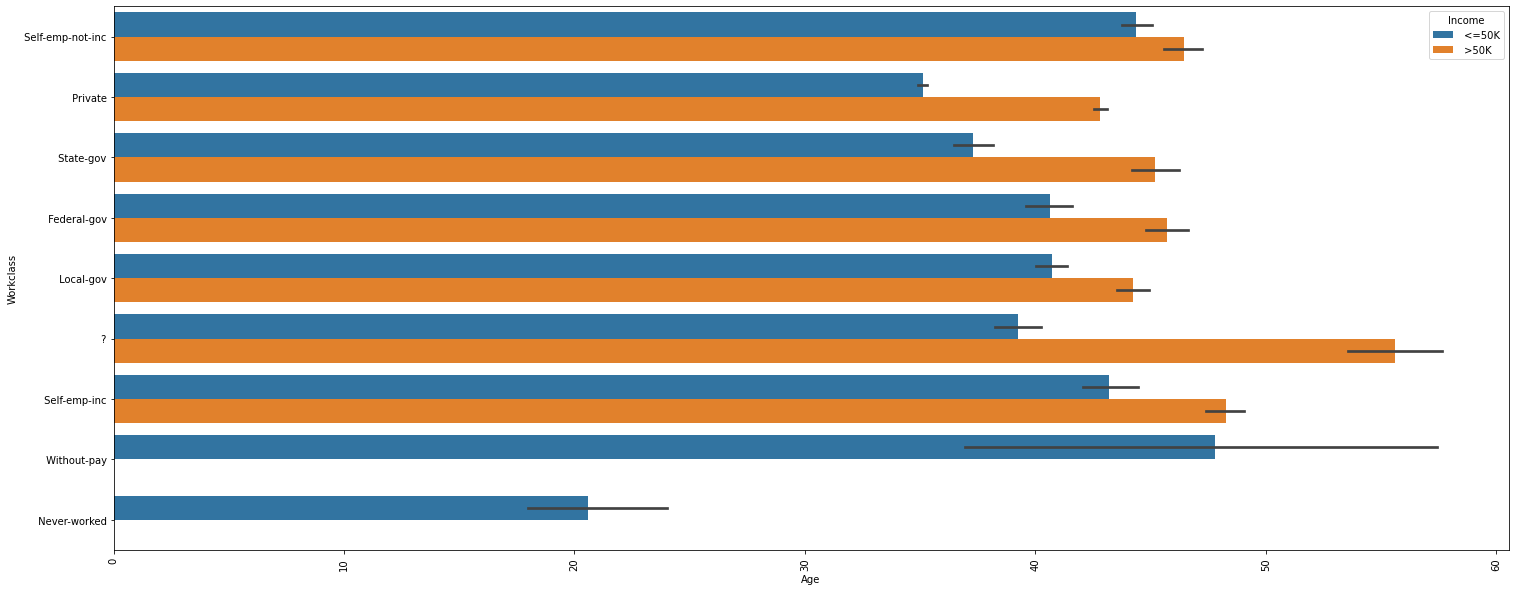

In [36]:
#plotting bar plot
plt.figure(figsize=(25,10))
sns.barplot(x='Age',y='Workclass',hue='Income',data=data)
plt.xticks(rotation="vertical")
plt.show()

**In this plot we can see that people with age less than 50 years for every workclass earns less than 50k, and for each and every workclass there are also people who earns more than 50k ecxept workclass without pay and never worked.**

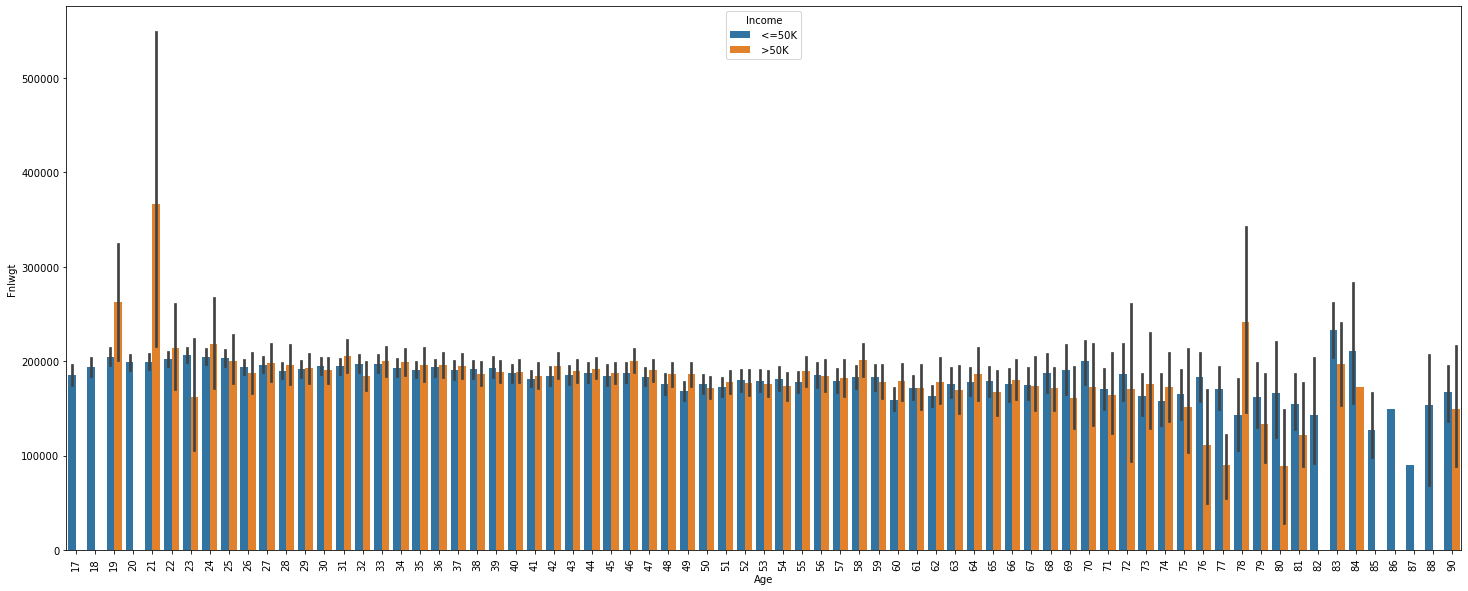

In [37]:
#plotting bar plot
plt.figure(figsize=(25,10))
sns.barplot(x='Age',y='Fnlwgt',hue='Income',data=data)
plt.xticks(rotation="vertical")
plt.show()

**In this plot we can see that people with age between 21 to 84 and with final count between 0 to 20000 earns more than 50k as well as less than 50k.**

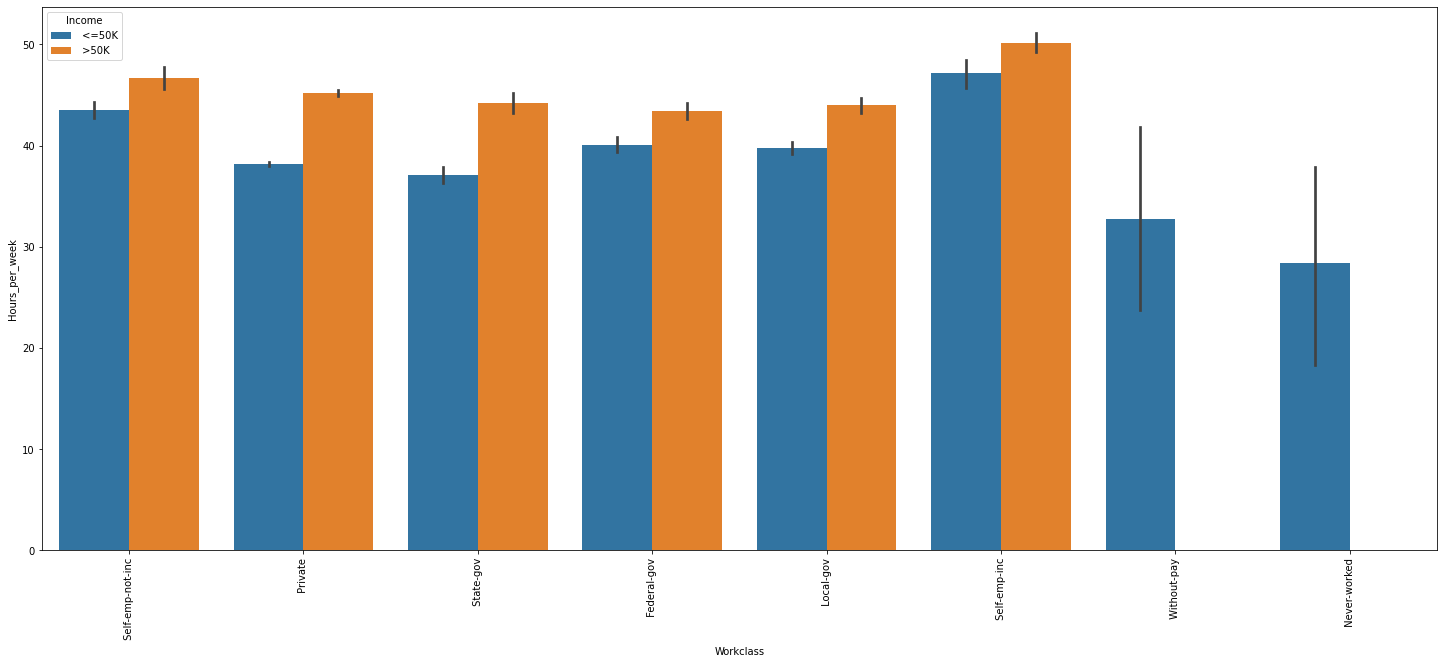

In [83]:
#plotting bar plot
plt.figure(figsize=(25,10))
sns.barplot(x='Workclass',y='Hours_per_week',hue='Income',data=data)
plt.xticks(rotation="vertical")
plt.show()

**In this plot we can see that people with workclass self-emp-inc are working for more hours per week, and most of the people are earning there less than 50k and also more than 50k.**

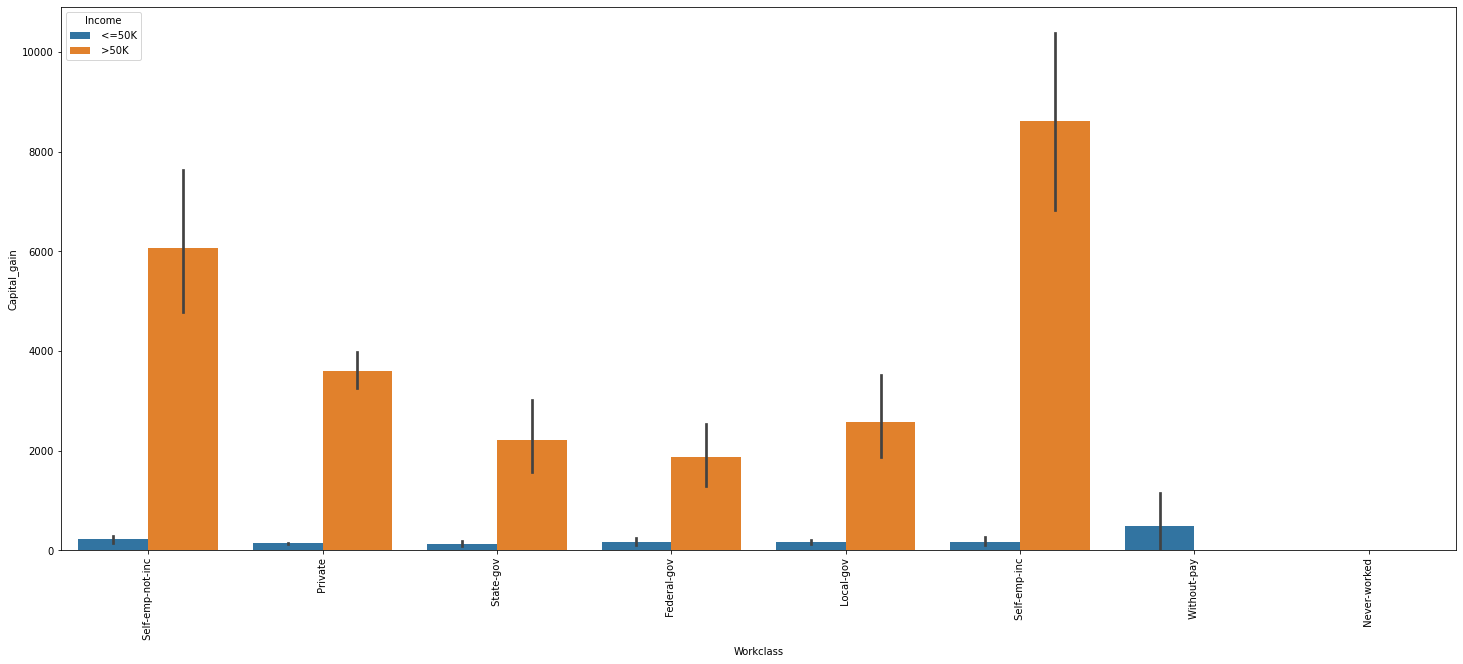

In [84]:
#plotting bar plot
plt.figure(figsize=(25,10))
sns.barplot(x='Workclass',y='Capital_gain',hue='Income',data=data)
plt.xticks(rotation="vertical")
plt.show()

**In this plot we can see that most of the people gained capital who are having workclass of self-emp-inc, and in this workclass people are earning more than 50k.Highest capital gain is more than 8000**

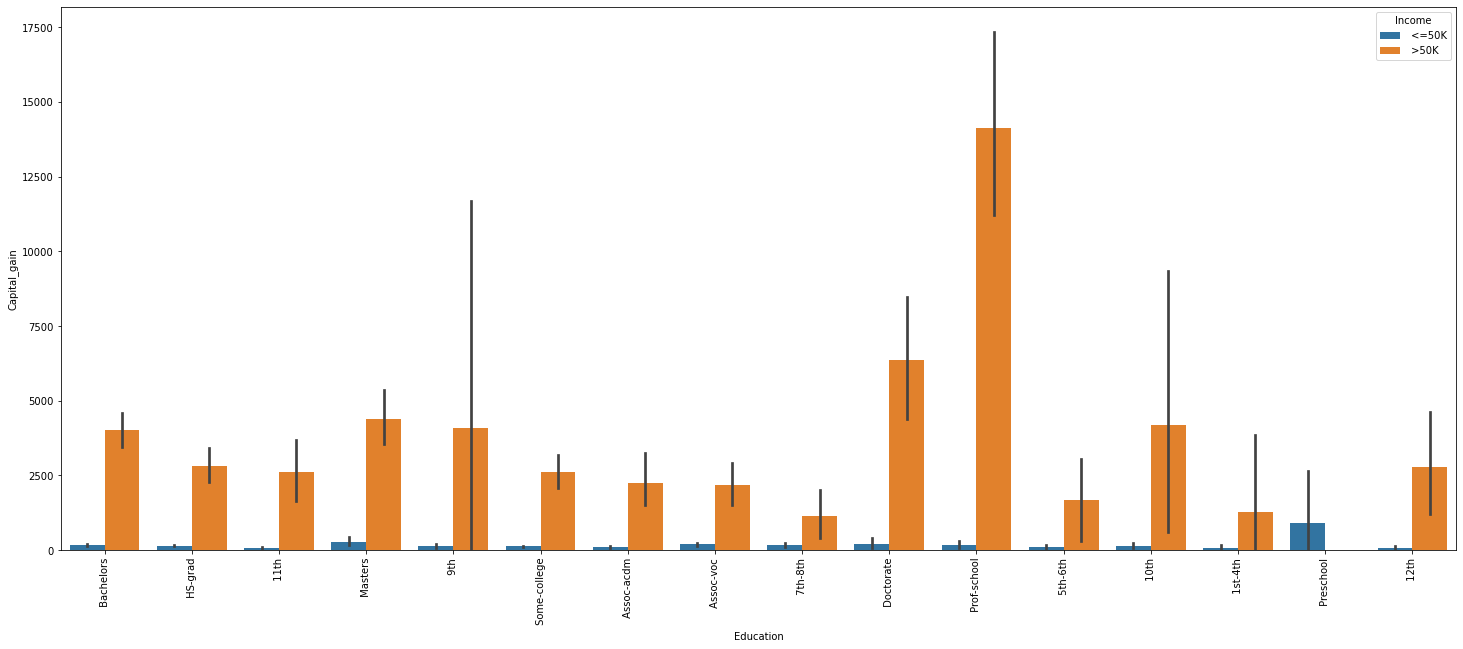

In [70]:
#plotting bar plot
plt.figure(figsize=(25,10))
sns.barplot(x='Education',y='Capital_gain',hue='Income',data=data)
plt.xticks(rotation="vertical")
plt.show()

**In this plot we can see that people who are having a education as prog school have gained the highest capital among the other educations, most of the people who have this education are earning more than 50k.**

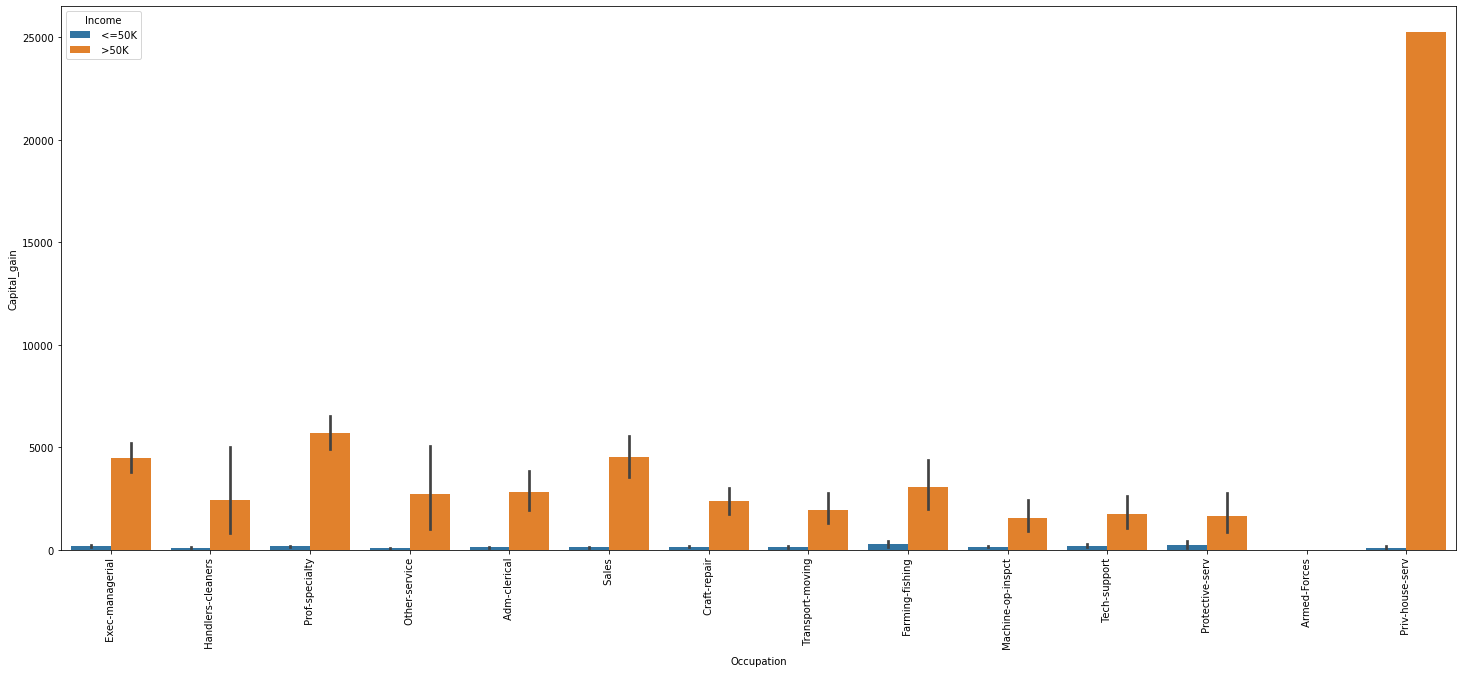

In [85]:
#plotting bar plot
plt.figure(figsize=(25,10))
sns.barplot(x='Occupation',y='Capital_gain',hue='Income',data=data)
plt.xticks(rotation="vertical")
plt.show()

**In this plot we can see that people with occupation as priv-house-serv have gained capital of around more than 20000.**

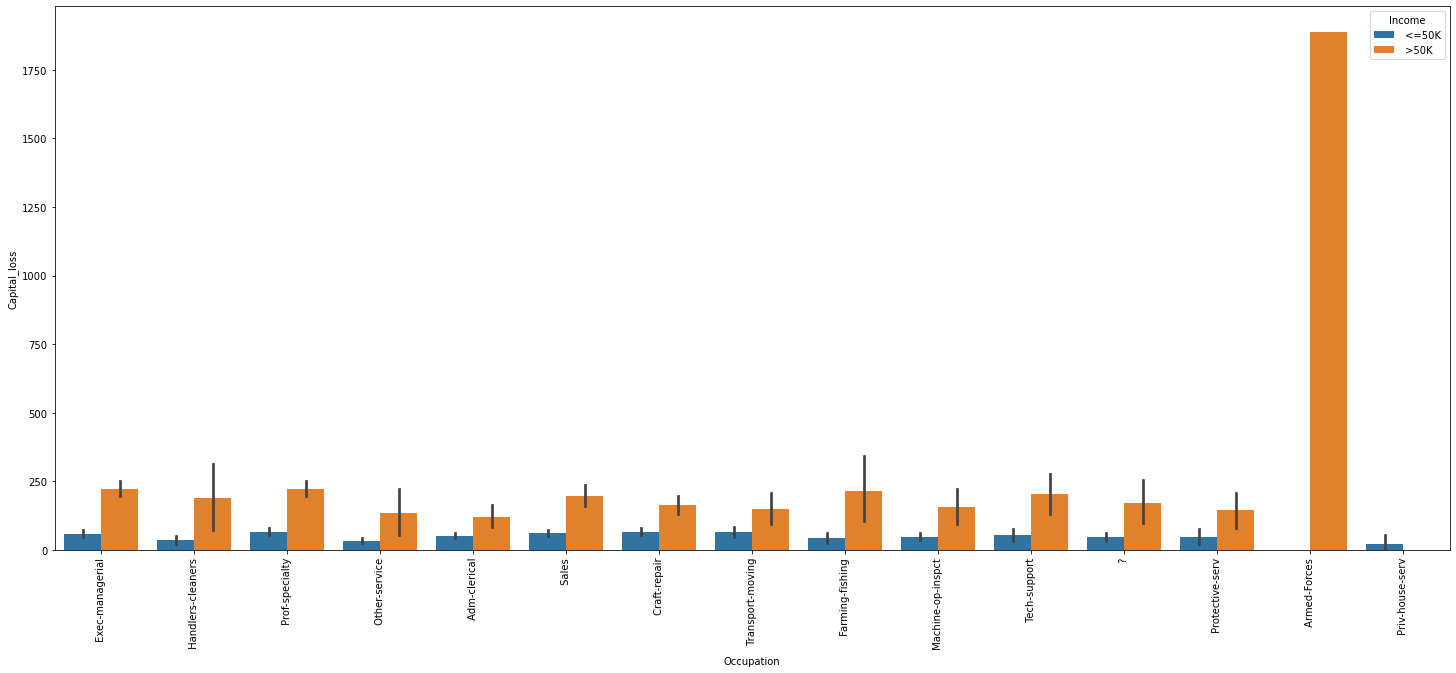

In [77]:
#plotting bar plot
plt.figure(figsize=(25,10))
sns.barplot(x='Occupation',y='Capital_loss',hue='Income',data=data)
plt.xticks(rotation="vertical")
plt.show()

**In this plot we can see that the people with occupation as armed forces have lost more capiatal that is more than 1750.**

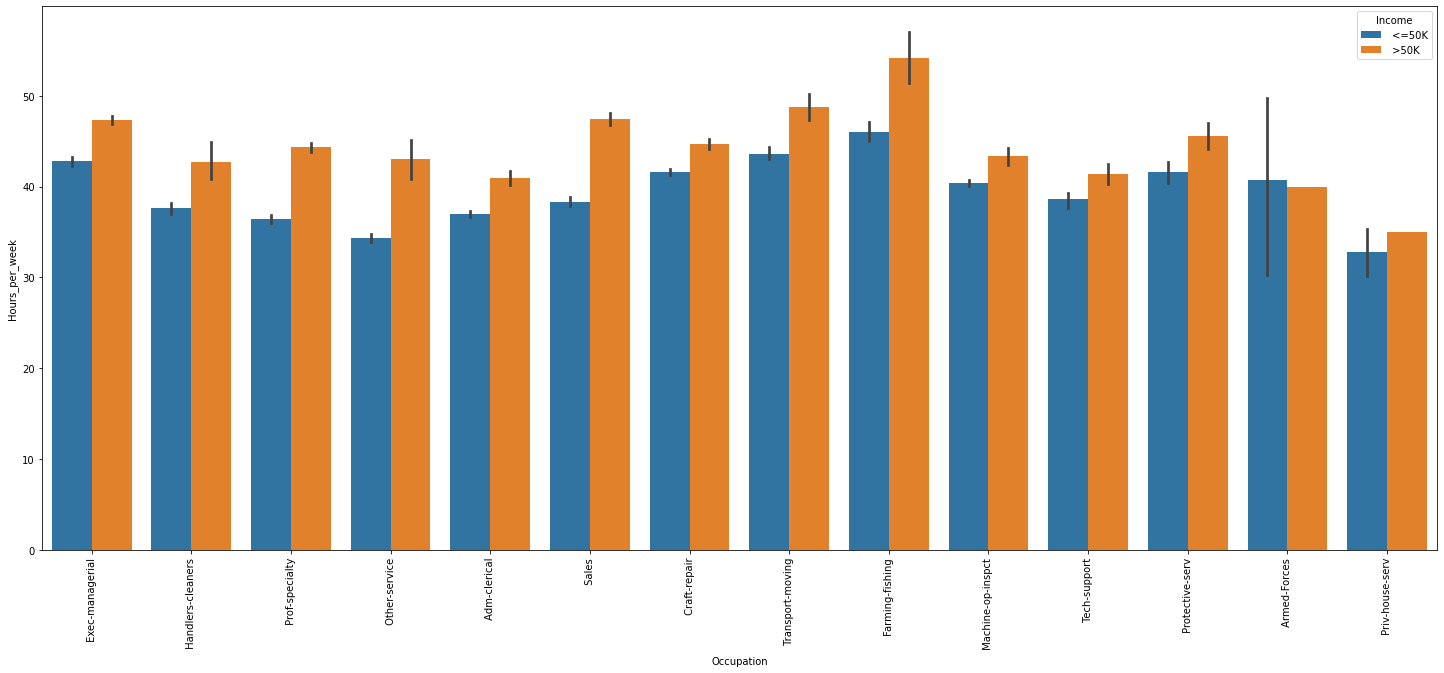

In [86]:
#plotting bar plot
plt.figure(figsize=(25,10))
sns.barplot(x='Occupation',y='Hours_per_week',hue='Income',data=data)
plt.xticks(rotation="vertical")
plt.show()

**By looking at the plot we can see that people having occupation as farming and fishing are working the most as per week that is more than 50 hours.**

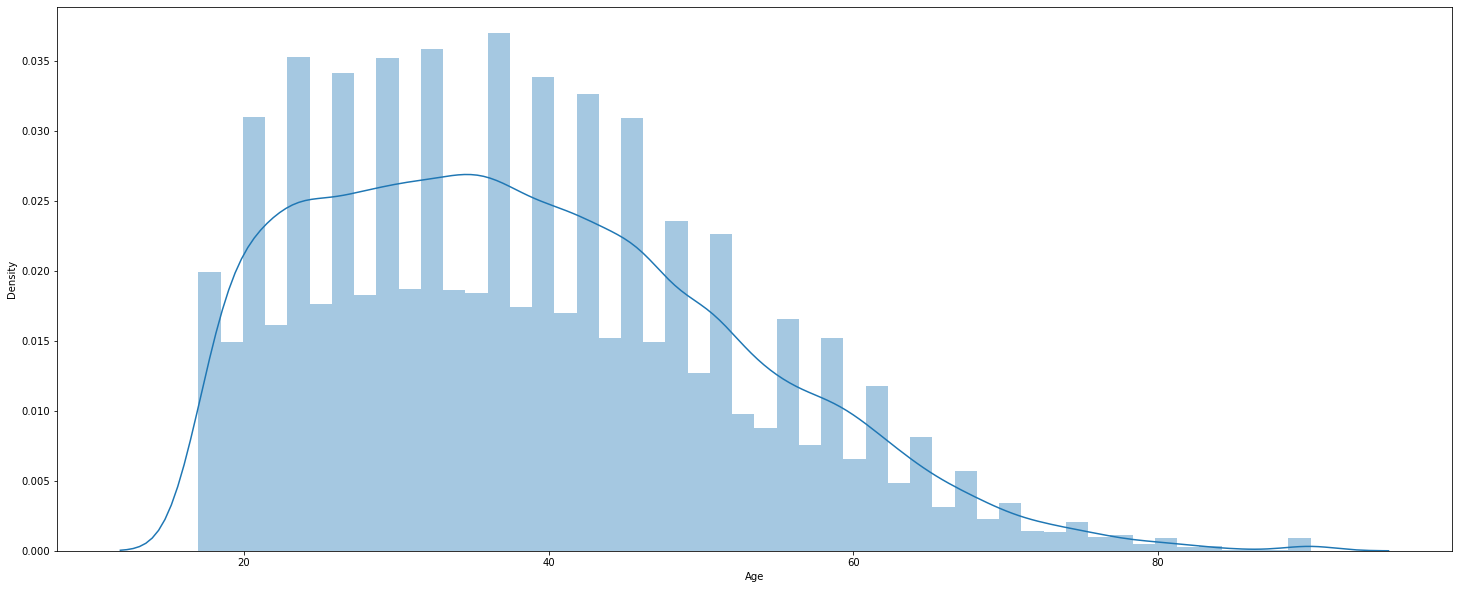

In [95]:
#plotting distribution plot
plt.figure(figsize=(25,10))
sns.distplot(data['Age'],kde=True)
plt.show()

**By looking at the plot we can see that the data is not normally distribiuted and skewness is present.**

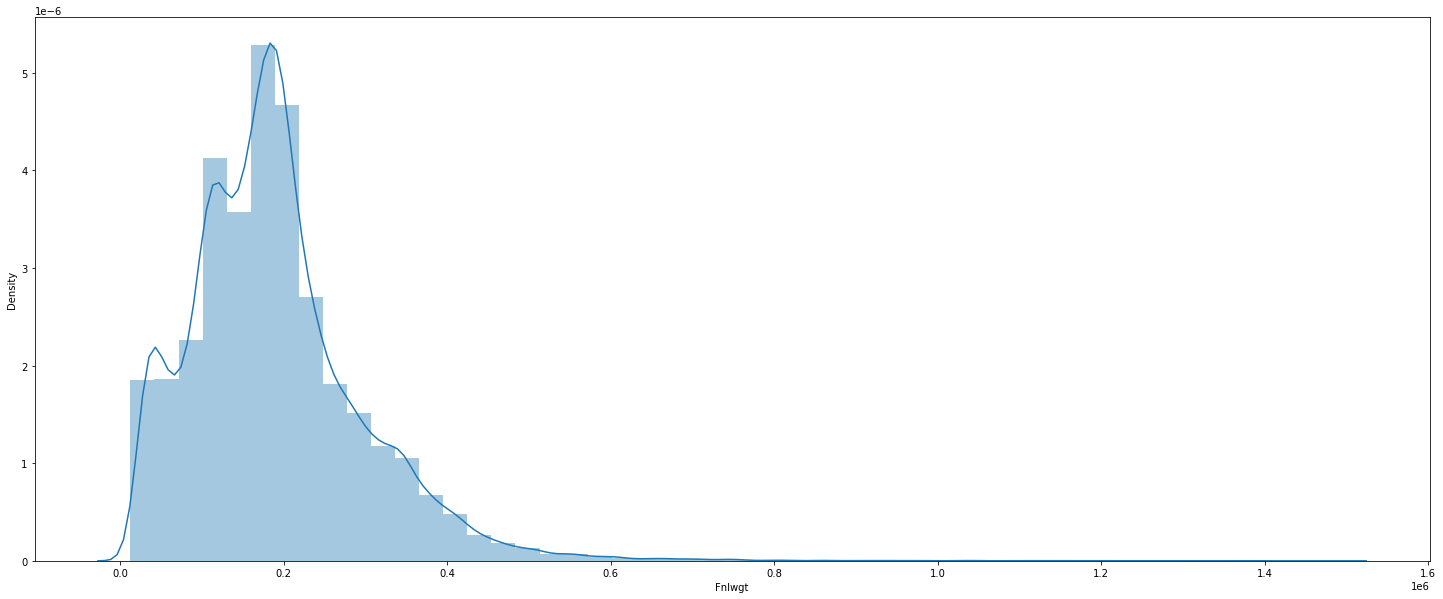

In [96]:
#plotting distribution plot
plt.figure(figsize=(25,10))
sns.distplot(data['Fnlwgt'],kde=True)
plt.show()

**By looking at the plot we can see that the data is not normally distribiuted and skewness is present.**

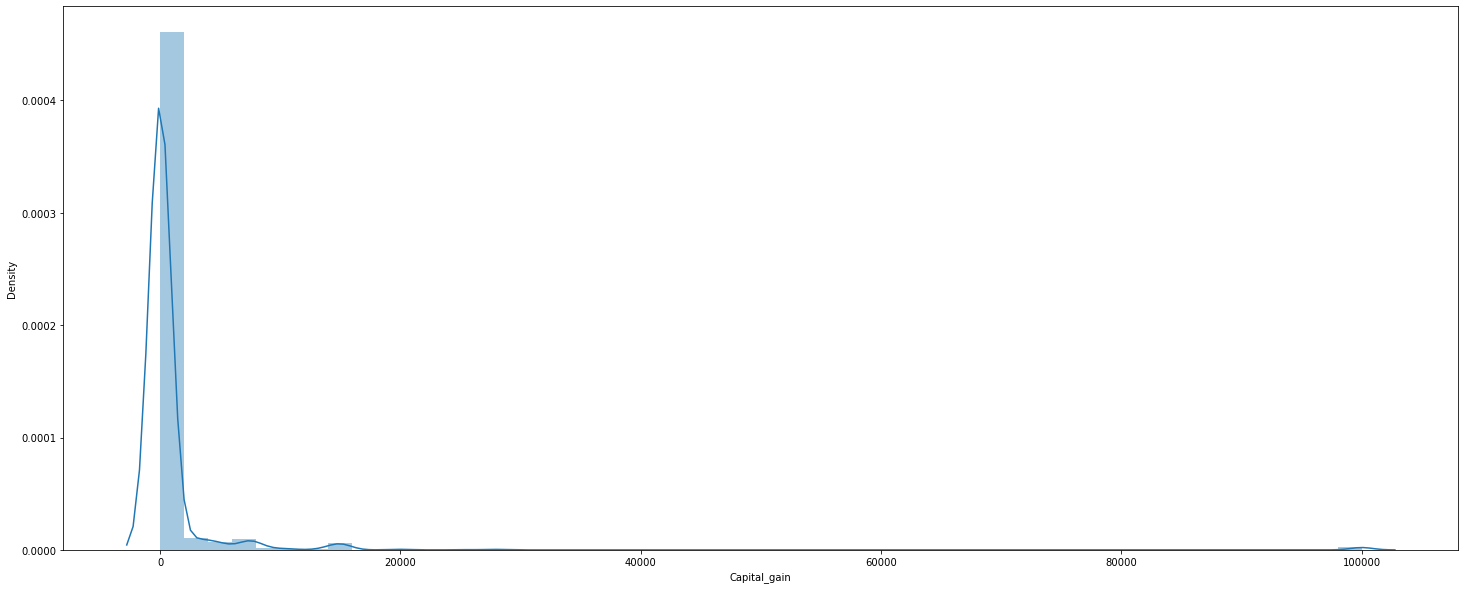

In [97]:
#plotting distribution plot
plt.figure(figsize=(25,10))
sns.distplot(data['Capital_gain'],kde=True)
plt.show()

**By looking at the plot we can see that the data is not normally distribiuted and skewness is present.**

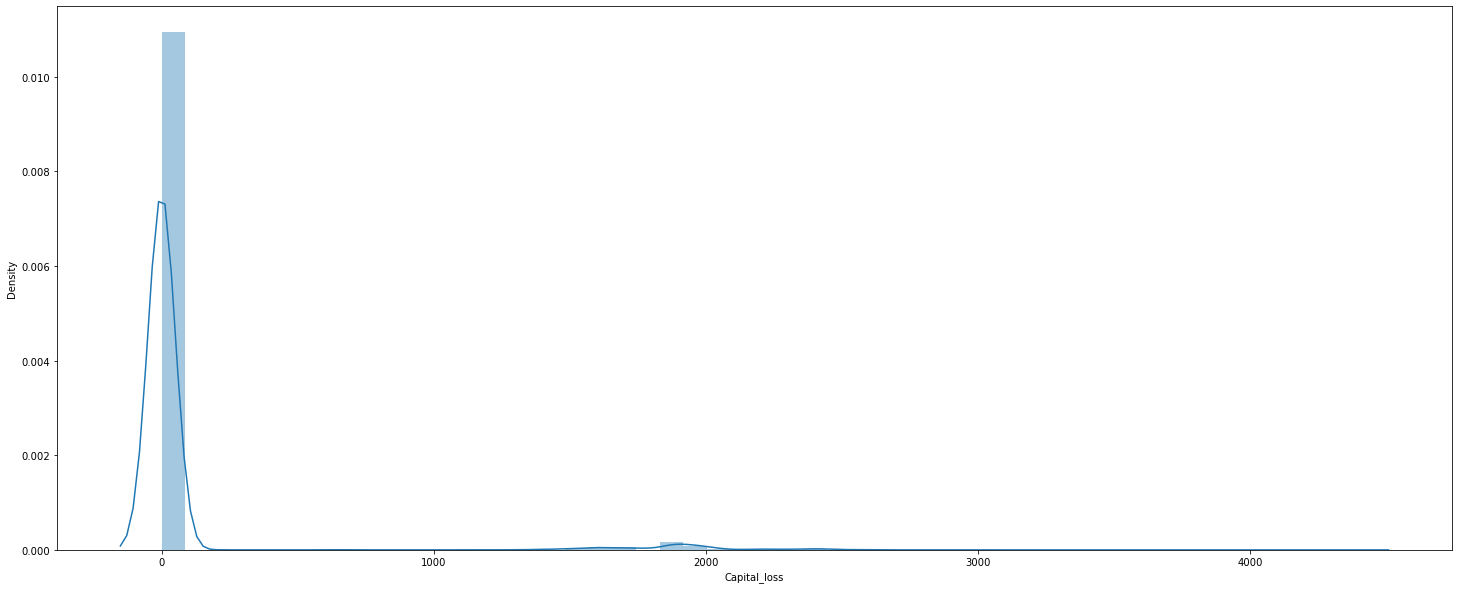

In [98]:
#plotting distribution plot
plt.figure(figsize=(25,10))
sns.distplot(data['Capital_loss'],kde=True)
plt.show()

**By looking at the plot we can see that the data is not normally distribiuted and skewness is present.**

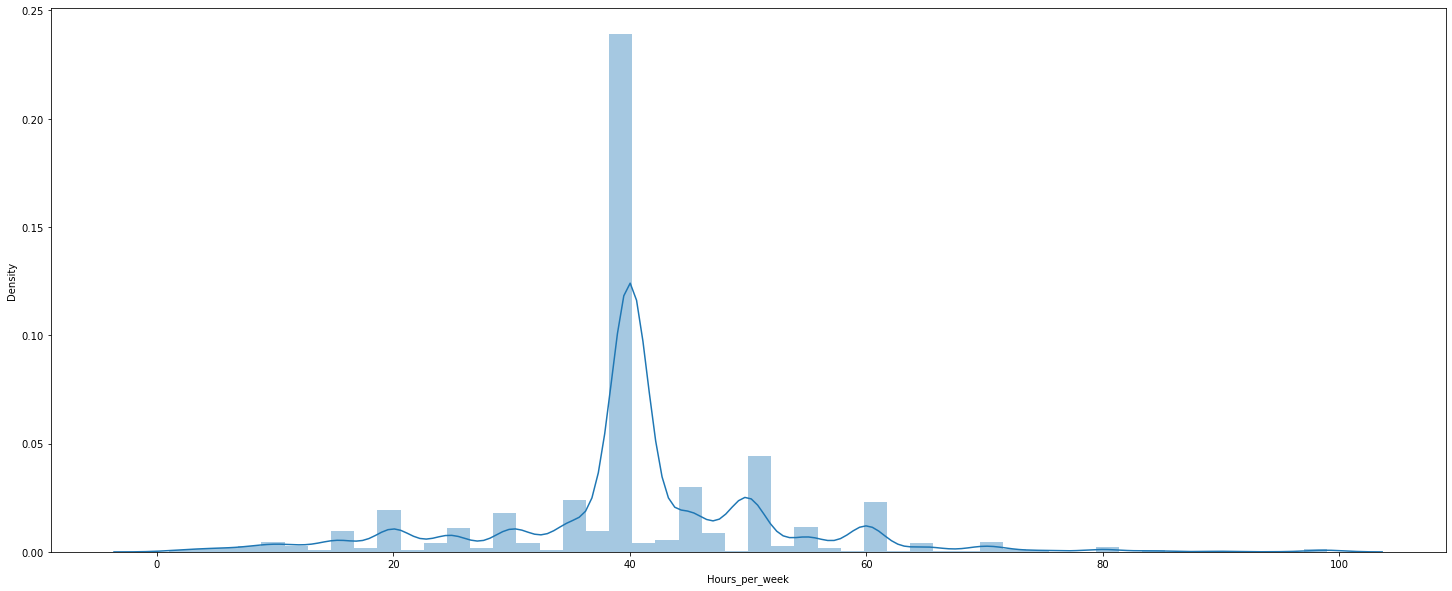

In [99]:
#plotting distribution plot
plt.figure(figsize=(25,10))
sns.distplot(data['Hours_per_week'],kde=True)
plt.show()

**By looking at the plot we can see that the data is not normally distribiuted and skewness is present.**

In [61]:
#Importing required libraries
from sklearn.preprocessing import LabelEncoder

In [62]:
#dropping education column as it has been already encoded.
data=data.drop(['Education'],axis=1)
data

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [63]:
#Encoding column
lab_enc=LabelEncoder()
df1=lab_enc.fit_transform(data['Marital_status'])
df2=lab_enc.fit_transform(data['Occupation'])
df3=lab_enc.fit_transform(data['Relationship'])
df4=lab_enc.fit_transform(data['Race'])
df5=lab_enc.fit_transform(data['Sex'])
df6=lab_enc.fit_transform(data['Native_country'])
df7=lab_enc.fit_transform(data['Income'])
df8=lab_enc.fit_transform(data['Workclass'])

In [64]:
#Transfering the data 
data['Marital_status']=df1
data['Occupation']=df2
data['Relationship']=df3
data['Race']=df4
data['Sex']=df5
data['Native_country']=df6
data['Income']=df7
data['Workclass']=df8

In [65]:
#Checking whether the data is encoded or not
data.head()

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,14,2,3,5,4,0,0,0,40,38,0


**so we can see that the data have been encoded.**

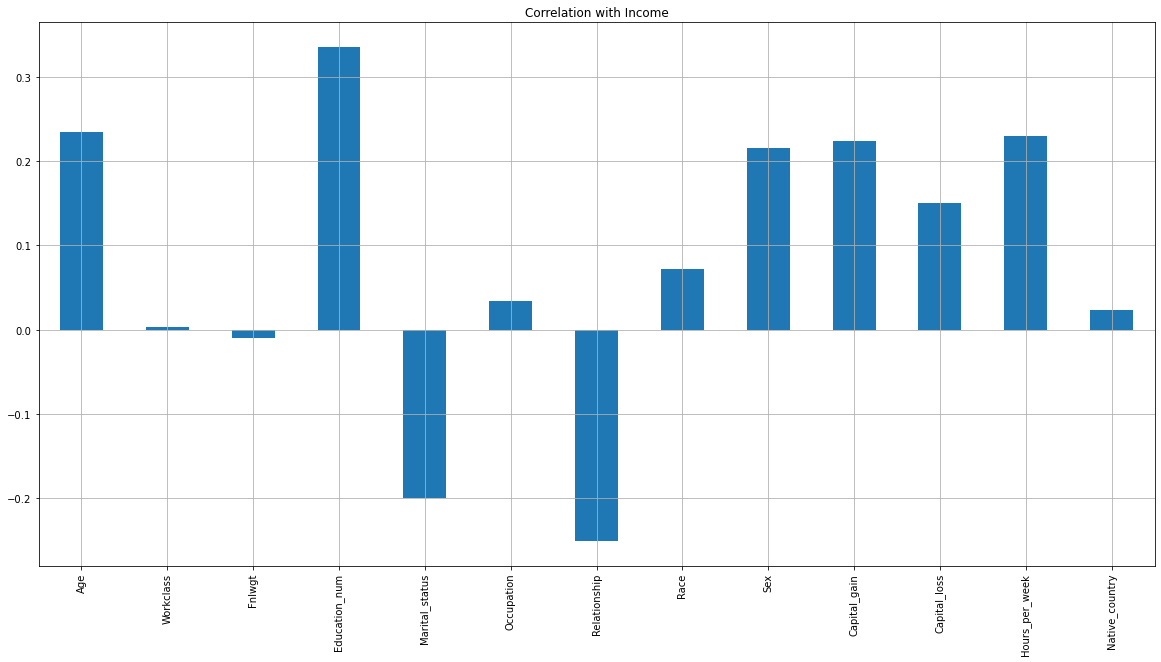

In [66]:
#Checking for correlation
data.drop(['Income'],axis=1).corrwith(data['Income']).plot(kind='bar',grid=True,figsize=(20,10),title='Correlation with Income')
plt.show()

**In this plot we can see that education num is highly corelated to the label that is income followed by relationship,age,sex,capital gain and hours per week and least corelated are final weight, workclass,occupation and native country.**

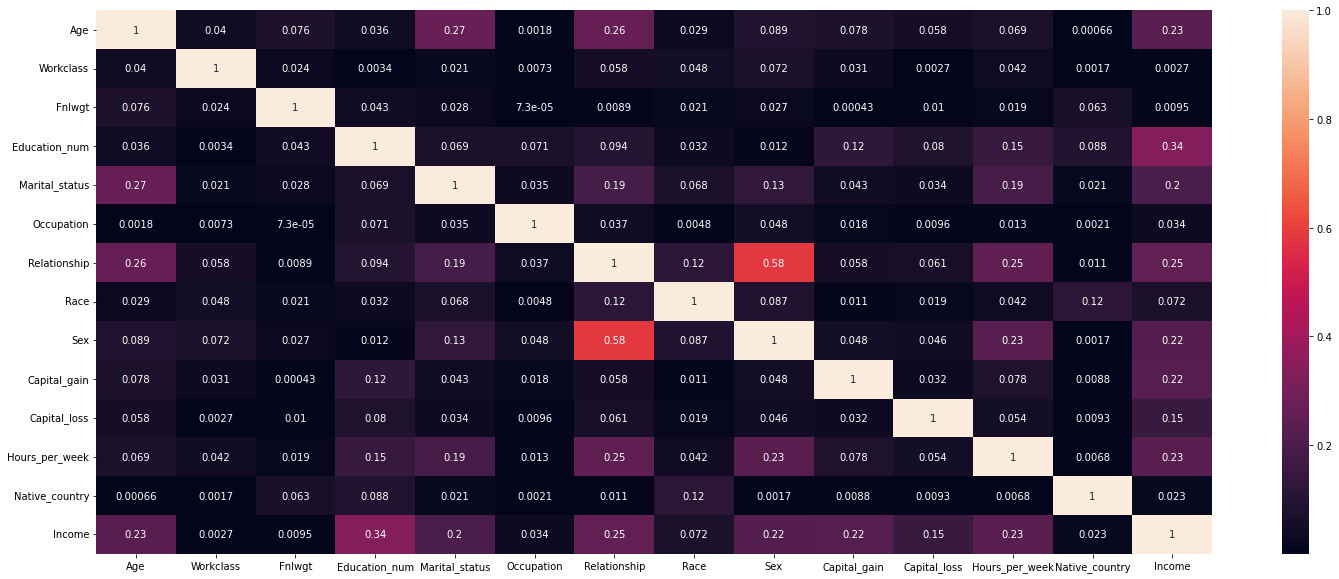

In [93]:
#Plotting heatmap
corr=data.corr().abs()
plt.figure(figsize=(25,10))
sns.heatmap(corr,annot=True)
plt.show()

**By looking at the heatmap we can see that not a single feature is multicorelated with the other feature.so i further i will check using vif.**

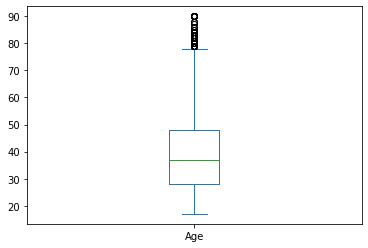

In [94]:
#Checking for outliers
data['Age'].plot.box()
plt.show()

**By looking at the plot we can see that outliers are not present.**

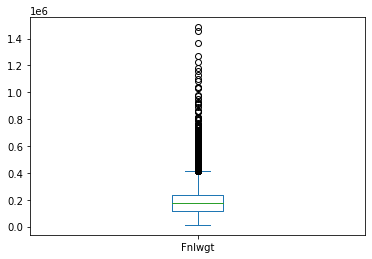

In [95]:
#Checking for outliers
data['Fnlwgt'].plot.box()
plt.show()

**By looking at the plot we can see that a lot of outliers are present.**

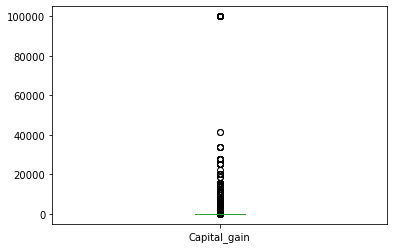

In [96]:
#Checking for outliers
data['Capital_gain'].plot.box()
plt.show()

**By looking at the plot we can see that only one outlier is present.**

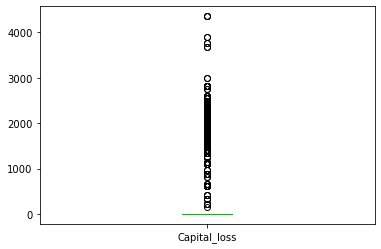

In [97]:
#Checking for outliers
data['Capital_loss'].plot.box()
plt.show()

**By looking at the plot we can see that only one outlier is present.**

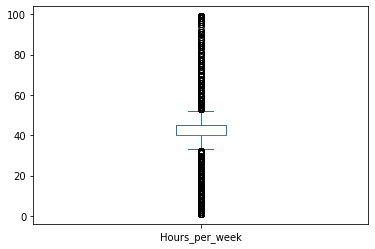

In [98]:
#Checking for outliers
data['Hours_per_week'].plot.box()
plt.show()

**By looking at the plot we can see that a lot of outliers are present.**

In [67]:
#Importing required libraries
from scipy.stats import zscore

In [68]:
#Removing outliers
z_score=zscore(data[['Age','Fnlwgt','Capital_gain','Capital_loss','Hours_per_week']])
abs_z_score=np.abs(z_score)
threshold=3
z=(abs_z_score<3).all(axis=1)

In [69]:
data=data[z]

In [70]:
data.shape

(30006, 14)

In [71]:
#Percentage Loss of Data
data_loss=((32536-30006)/32536)*100
print(f'Data Loss:{data_loss} %')

Data Loss:7.77600196705188 %


In [72]:
#checking skewness
data.skew()

Age                0.489089
Workclass          0.093472
Fnlwgt             0.634650
Education_num     -0.321906
Marital_status    -0.046984
Occupation         0.005705
Relationship       0.745512
Race              -2.431482
Sex               -0.681840
Capital_gain       4.955914
Capital_loss      29.750401
Hours_per_week    -0.349780
Native_country    -4.221494
Income             1.338926
dtype: float64

**So we can see this column Age,capital gain and capital loss have skewness and rest of the columns who have value more than 0.5 are categorical data columns and we dont treat skewness of categorical data columns and label.**

In [73]:
#Importing required libraries
from sklearn.preprocessing import power_transform

In [74]:
data[['Fnlwgt','Capital_gain','Capital_loss']]=power_transform(data[['Fnlwgt','Capital_gain','Capital_loss']],method='yeo-johnson')
data[['Fnlwgt','Capital_gain','Capital_loss']]

,Fnlwgt,Capital_gain,Capital_loss
0,-1.116187,-0.296119,-0.040028
1,0.422190,-0.296119,-0.040028
2,0.601942,-0.296119,-0.040028
3,1.480433,-0.296119,-0.040028
4,1.042640,-0.296119,-0.040028
...,...,...,...
32555,0.806332,-0.296119,-0.040028
32556,-0.211102,-0.296119,-0.040028
32557,-0.238776,-0.296119,-0.040028
32558,0.284060,-0.296119,-0.040028


In [75]:
#checking skewness
data.skew()

Age                0.489089
Workclass          0.093472
Fnlwgt            -0.034764
Education_num     -0.321906
Marital_status    -0.046984
Occupation         0.005705
Relationship       0.745512
Race              -2.431482
Sex               -0.681840
Capital_gain       3.081061
Capital_loss      24.943713
Hours_per_week    -0.349780
Native_country    -4.221494
Income             1.338926
dtype: float64

In [76]:
#Dividing dataset into features and label
#Features
x=data.drop(['Income'],axis=1)
#Label
y=data['Income']

In [77]:
#Standardiziing the data
#Importing require libraries
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
x_scaler=Scaler.fit_transform(x)
x_scaler

array([[ 0.88268662,  1.73674202, -1.116187  , ..., -0.04002803,
        -2.41253295,  0.26260326],
       [-0.01434971, -0.07805072,  0.42218981, ..., -0.04002803,
         0.01039257,  0.26260326],
       [ 1.1069457 , -0.07805072,  0.60194168, ..., -0.04002803,
         0.01039257,  0.26260326],
       ...,
       [ 1.48071084, -0.07805072, -0.23877554, ..., -0.04002803,
         0.01039257,  0.26260326],
       [-1.21039815, -0.07805072,  0.28405986, ..., -0.04002803,
        -1.78436708,  0.26260326],
       [ 1.03219267,  0.82934565,  1.07089102, ..., -0.04002803,
         0.01039257,  0.26260326]])

In [78]:
x_scaler.shape

(30006, 13)

In [79]:
#Importing require libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [80]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaler,i)for i in range(x_scaler.shape[1])]
vif['feature']=x.columns
vif

,vif,feature
0,1.174026,Age
1,1.008005,Workclass
2,1.012429,Fnlwgt
3,1.056776,Education_num
4,1.136924,Marital_status
5,1.010891,Occupation
6,1.671163,Relationship
7,1.031944,Race
8,1.548680,Sex
9,1.030621,Capital_gain


**so in this we can see that there not a single value which is more than 5.so we can say that there is no multicollinearity problem.**

In [82]:
#importing required libraries
from sklearn.feature_selection import SelectKBest, f_classif

In [83]:
best_features=SelectKBest(score_func=f_classif,k=10)
fit=best_features.fit(x_scaler,y)
data_scores=pd.DataFrame(fit.scores_)
data_columns=pd.DataFrame(x.columns)
feature_scores=pd.concat([data_columns,data_scores],axis=1)
feature_scores.columns=['Feature_Name','Score']
print(feature_scores.nlargest(10,'Score'))

      Feature_Name        Score
3    Education_num  3355.926906
9     Capital_gain  2211.744234
6     Relationship  1914.107143
0              Age  1777.290972
11  Hours_per_week  1683.735375
8              Sex  1368.951324
4   Marital_status  1179.652028
7             Race   156.330957
5       Occupation    27.260484
12  Native_country    13.803214


In [84]:
new_feature=data[['Education_num', 'Capital_gain', 'Relationship', 'Age', 'Hours_per_week', 'Sex', 'Marital_status', 'Race', 'Occupation', 'Native_country']]
new_feature

,Education_num,Capital_gain,Relationship,Age,Hours_per_week,Sex,Marital_status,Race,Occupation,Native_country
0,13,-0.296119,0,50,13,1,2,4,3,38
1,9,-0.296119,1,38,40,1,0,4,5,38
2,7,-0.296119,0,53,40,1,2,2,5,38
3,13,-0.296119,5,28,40,0,2,2,9,4
4,14,-0.296119,5,37,40,0,2,4,3,38
...,...,...,...,...,...,...,...,...,...,...
32555,12,-0.296119,5,27,38,0,2,4,12,38
32556,9,-0.296119,0,40,40,1,2,4,6,38
32557,9,-0.296119,4,58,40,0,6,4,0,38
32558,9,-0.296119,3,22,20,1,4,4,0,38


**As we have seen while plotting the counplot for label, we had seen that the label was not balanced so using smote technique to balance the data.**

In [85]:
#Using oversampling method-Smote method
#importing required libraries
from imblearn.over_sampling import SMOTE

In [86]:
over_samp=SMOTE(0.75)

In [87]:
x_new,y_new=over_samp.fit_resample(new_feature,y)

In [88]:
print('The number of classes before fit {}'.format(y.value_counts()))

The number of classes before fit 0    23349
1     6657
Name: Income, dtype: int64


In [89]:
print('The number of classes after fit {}'.format(y_new.value_counts()))

The number of classes after fit 0    23349
1    17511
Name: Income, dtype: int64


In [90]:
#Importing required libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score,plot_roc_curve,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.svm import SVC

**Logistic Regression**

In [91]:
#instantiating the model
lr=LogisticRegression()

In [92]:
#using range fucntion to find the best random state using Logestic regression
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_train)
    y_pred=lr.predict(x_test)
    print(f'at random state{i},the training accuracy is:{accuracy_score(y_train,pred)*100}')
    print(f'at random state{i},the testing accuracy is:{accuracy_score(y_test,y_pred)*100}')
    print('\n')

at random state0,the training accuracy is:75.08565834557024
at random state0,the testing accuracy is:75.16397454723446


at random state1,the training accuracy is:75.3434491760483
at random state1,the testing accuracy is:75.02692119432207


at random state2,the training accuracy is:75.04976341980748
at random state2,the testing accuracy is:75.70239843367597


at random state3,the training accuracy is:75.1052373959863
at random state3,the testing accuracy is:75.50660792951543


at random state4,the training accuracy is:74.97471039321259
at random state4,the testing accuracy is:74.93881546744983


at random state5,the training accuracy is:73.95986294664709
at random state5,the testing accuracy is:74.17523250122369


at random state6,the training accuracy is:75.26186979931472
at random state6,the testing accuracy is:75.74155653450808


at random state7,the training accuracy is:75.40544950236581
at random state7,the testing accuracy is:75.60450318159569


at random state8,the training accu

**Taking random state as 92.**

In [93]:
#Training Testing and Spliting the data
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=0.25,random_state=92)

In [94]:
#Building Model to test unexposed data
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        pred=clf.predict(x_train)
        print('\n=====Train Score=====')
        print(f'Accuracy Score:{accuracy_score(y_train,pred)*100:.2f}%')
    elif train==False:
        y_pred=clf.predict(x_test)
        print('\n=====Test Score=====')
        print(f'Accuracy Score:{accuracy_score(y_test,y_pred)*100:.2f}%')
        print('\n Test Classification Report:\n',classification_report(y_test,y_pred,digits=2))
        print('\n Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
        print('\n F1 Score:\n',f1_score(y_test,y_pred,average='micro'))

In [95]:
#Training the data
lr.fit(x_train,y_train)

LogisticRegression()

In [96]:
#calling the function and passing the dataset for logistic regression
metric_score(lr,x_train,x_test,y_train,y_test,train=True)#for training
metric_score(lr,x_train,x_test,y_train,y_test,train=False)#for testing


=====Train Score=====
Accuracy Score:75.74%

=====Test Score=====
Accuracy Score:75.22%

 Test Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.79      0.79      5845
           1       0.71      0.70      0.71      4370

    accuracy                           0.75     10215
   macro avg       0.75      0.75      0.75     10215
weighted avg       0.75      0.75      0.75     10215


 Confusion Matrix:
 [[4622 1223]
 [1308 3062]]

 F1 Score:
 0.7522271169848262


In [97]:
#Checking Cross Validation score
#Importing required libraries
from sklearn.model_selection import cross_val_score

In [98]:
y_pred=lr.predict(x_test)
test_accuracy=accuracy_score(y_test,y_pred)

In [99]:
#Checking cross validation score
for j in range(2,6):
    cv_score=cross_val_score(lr,x_new,y_new,cv=j)
    cv_mean=cv_score.mean()
    print(f'at cross fold {j} the cv score is{cv_mean}and accuracy for the testing is {test_accuracy}')
    print('\n')

at cross fold 2 the cv score is0.745741556534508and accuracy for the testing is 0.7522271169848262


at cross fold 3 the cv score is0.7463778756730298and accuracy for the testing is 0.7522271169848262


at cross fold 4 the cv score is0.7512481644640234and accuracy for the testing is 0.7522271169848262


at cross fold 5 the cv score is0.751443954968184and accuracy for the testing is 0.7522271169848262




**Taking cv=5.**

In [100]:
#plotting roc curve
fpr,tpr,threshold=roc_curve(y_test,y_pred)

In [101]:
print('FPR',fpr)
print('TPR',tpr)
print('Threshold',threshold)

FPR [0.         0.20923867 1.        ]
TPR [0.        0.7006865 1.       ]
Threshold [2 1 0]


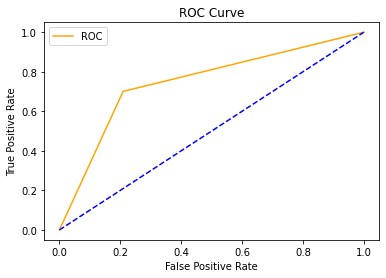

In [102]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='blue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**RandomForest Classifier**

In [103]:
#Instantiating the model
rfc=RandomForestClassifier()

In [104]:
#Training Testing and Spliting the data
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=0.25,random_state=92)

In [105]:
#Training the data
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [106]:
#calling the function and passing the dataset for random forest
metric_score(rfc,x_train,x_test,y_train,y_test,train=True)#for training
metric_score(rfc,x_train,x_test,y_train,y_test,train=False)#for testing


=====Train Score=====
Accuracy Score:96.08%

=====Test Score=====
Accuracy Score:86.03%

 Test Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.88      5845
           1       0.82      0.86      0.84      4370

    accuracy                           0.86     10215
   macro avg       0.86      0.86      0.86     10215
weighted avg       0.86      0.86      0.86     10215


 Confusion Matrix:
 [[5022  823]
 [ 604 3766]]

 F1 Score:
 0.8603034752814489


In [107]:
#Checking cross validation score
cv_score=cross_val_score(rfc,x_new,y_new,cv=5).mean()
cv_score

0.8631179637787568

In [108]:
#plotting roc curve
fpr,tpr,threshold=roc_curve(y_test,y_pred)

In [109]:
print('FPR',fpr)
print('TPR',tpr)
print('Threshold',threshold)

FPR [0.         0.20923867 1.        ]
TPR [0.        0.7006865 1.       ]
Threshold [2 1 0]


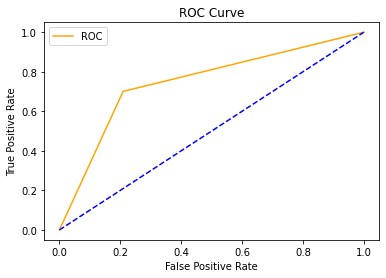

In [110]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='blue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**Gradient Boosting Classifier**

In [111]:
#Initiating Gradient Boosting classifier
gb=GradientBoostingClassifier()

In [112]:
#Training Testing and Spliting the data
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=0.25,random_state=92)

In [113]:
#Training the data
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [114]:
#calling the function and passing the dataset for gradient boosting
metric_score(gb,x_train,x_test,y_train,y_test,train=True)#for training
metric_score(gb,x_train,x_test,y_train,y_test,train=False)#for testing


=====Train Score=====
Accuracy Score:84.07%

=====Test Score=====
Accuracy Score:83.30%

 Test Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.83      0.85      5845
           1       0.79      0.84      0.81      4370

    accuracy                           0.83     10215
   macro avg       0.83      0.83      0.83     10215
weighted avg       0.84      0.83      0.83     10215


 Confusion Matrix:
 [[4852  993]
 [ 713 3657]]

 F1 Score:
 0.8329906999510523


In [115]:
#Checking cross validation score
cv_score=cross_val_score(gb,x_new,y_new,cv=5).mean()
cv_score

0.8352667645619187

In [116]:
#plotting roc curve
fpr,tpr,threshold=roc_curve(y_test,y_pred)

In [117]:
print('FPR',fpr)
print('TPR',tpr)
print('Threshold',threshold)

FPR [0.         0.20923867 1.        ]
TPR [0.        0.7006865 1.       ]
Threshold [2 1 0]


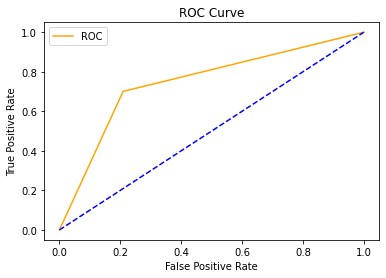

In [118]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='blue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**Ada Boost Classifier**

In [119]:
#Initiating Ada boost classifier
ada=AdaBoostClassifier()

In [120]:
#Training Testing and Spliting the data
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=0.25,random_state=92)

In [121]:
#Training the data
ada.fit(x_train,y_train)

AdaBoostClassifier()

In [122]:
#calling the function and passing the dataset for ada boost
metric_score(ada,x_train,x_test,y_train,y_test,train=True)#for training
metric_score(ada,x_train,x_test,y_train,y_test,train=False)#for testing


=====Train Score=====
Accuracy Score:82.99%

=====Test Score=====
Accuracy Score:82.45%

 Test Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.82      0.84      5845
           1       0.78      0.82      0.80      4370

    accuracy                           0.82     10215
   macro avg       0.82      0.82      0.82     10215
weighted avg       0.83      0.82      0.83     10215


 Confusion Matrix:
 [[4819 1026]
 [ 767 3603]]

 F1 Score:
 0.8244738130200686


In [123]:
#Checking cross validation score
cv_score=cross_val_score(ada,x_new,y_new,cv=5).mean()
cv_score

0.8265051395007343

In [124]:
#plotting roc curve
fpr,tpr,threshold=roc_curve(y_test,y_pred)

In [125]:
print('FPR',fpr)
print('TPR',tpr)
print('Threshold',threshold)

FPR [0.         0.20923867 1.        ]
TPR [0.        0.7006865 1.       ]
Threshold [2 1 0]


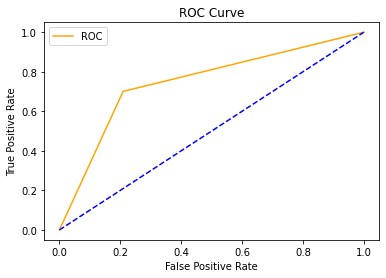

In [126]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='blue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**Support vector Machine**

In [127]:
#instantiatiating the model
svm=SVC()

In [128]:
#Training Testing and Spliting the data
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=0.25,random_state=92)

In [129]:
#Training the data
svm.fit(x_train,y_train)

SVC()

In [130]:
#calling the function and passing the dataset for svc
metric_score(svm,x_train,x_test,y_train,y_test,train=True)#for training
metric_score(svm,x_train,x_test,y_train,y_test,train=False)#for testing


=====Train Score=====
Accuracy Score:76.89%

=====Test Score=====
Accuracy Score:76.22%

 Test Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79      5845
           1       0.72      0.73      0.72      4370

    accuracy                           0.76     10215
   macro avg       0.76      0.76      0.76     10215
weighted avg       0.76      0.76      0.76     10215


 Confusion Matrix:
 [[4588 1257]
 [1172 3198]]

 F1 Score:
 0.7622124326970142


In [131]:
#Checking cross validation score
cv_score=cross_val_score(svm,x_new,y_new,cv=5).mean()
cv_score

0.7678903573176701

In [132]:
#plotting roc curve
fpr,tpr,threshold=roc_curve(y_test,y_pred)

In [133]:
print('FPR',fpr)
print('TPR',tpr)
print('Threshold',threshold)

FPR [0.         0.20923867 1.        ]
TPR [0.        0.7006865 1.       ]
Threshold [2 1 0]


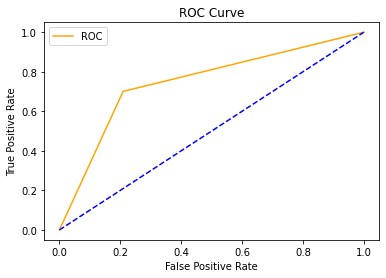

In [134]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='blue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [135]:
#Making dataframe of all the models
data=pd.DataFrame({
    'Models':['Logistic','Random Forest','Gradient Boosting','Ada','SVM'],
    'Training Score':[75.74,96.08,84.07,82.99,76.89],
    'Testing Score':[75.22,86.03,83.30,82.45,76.22],
    'Cross Val Score':[75.14,86.31,83.52,82.65,76.89],
    'F1 score':[75.22,86.03,83.29,82.44,76.22]
})
data

,Models,Training Score,Testing Score,Cross Val Score,F1 score
0,Logistic,75.74,75.22,75.14,75.22
1,Random Forest,96.08,86.03,86.31,86.03
2,Gradient Boosting,84.07,83.30,83.52,83.29
3,Ada,82.99,82.45,82.65,82.44
4,SVM,76.89,76.22,76.89,76.22


**Observation**
* **By looking at all the models we can see that Random Forest has seen most of the data that is 96.16% compared to other models and testing score is also good that is 86.3% which is the highest among the other models and cross validation score and f1-score is very close to the testing score.**
* **As Random Forest have seen most of the data and also giving good testing score,cross validation score and f1-score among other models.
* **So iam going forward with Random Forest.**

In [138]:
#Using Grid Search cv for hyperparameter tuning for Random Forest
from sklearn.model_selection import GridSearchCV

In [139]:
param_grid=({
    'n_estimators': [100,200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,4,6],
    'criterion' :['gini', 'entropy']
})

In [140]:
grid_search=GridSearchCV(rfc,param_grid=param_grid,cv=5)

In [141]:
#Training
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200]})

In [142]:
#best Parameters
grid_search.best_params_ 

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'log2',
 'n_estimators': 200}

In [144]:
#Training with the best parameters
rfc1=RandomForestClassifier(criterion='gini',max_depth=6,max_features='log2',n_estimators=200)
rfc1.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, max_features='log2', n_estimators=200)

In [145]:
#calling the function and passing the dataset
metric_score(rfc1,x_train,x_test,y_train,y_test,train=True)#Training Score
metric_score(rfc1,x_train,x_test,y_train,y_test,train=False)#Testing Score


=====Train Score=====
Accuracy Score:82.36%

=====Test Score=====
Accuracy Score:81.75%

 Test Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.78      0.83      5845
           1       0.75      0.87      0.80      4370

    accuracy                           0.82     10215
   macro avg       0.82      0.82      0.82     10215
weighted avg       0.83      0.82      0.82     10215


 Confusion Matrix:
 [[4556 1289]
 [ 575 3795]]

 F1 Score:
 0.817523250122369


**Observation**
* **So we can see that after doing hyperparameter tuning training score,testing score,cross validation score and f1-score decreases.so going forward i will not consider this model.**
* **So iam saving the random forest model on which hyperparameter tuning was not done.**

In [147]:
#Checking cross validation score
cv_score=cross_val_score(rfc1,x_new,y_new,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.8209740577581988

In [148]:
y_pred_prob=rfc.predict_proba(x_test)

In [149]:
#Checking AUC Score
roc_auc_score=roc_auc_score(y_test,y_pred)
roc_auc_score

0.7457239166648723

In [150]:
#saving the model
#Importing required libraries
import pickle
pickle.dump(rfc,open('Census Income Project','wb'))